# Data Preprocessing

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

## Importing the Data

In [47]:
df_train = pd.read_csv('train_data.csv')

C:\Users\alexr\AppData\Local\Temp\ipykernel_72572\4102572529.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('train_data.csv')


Firstly we need to get a general idea of the data we are working with.

In [48]:
df_train.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [49]:
df_train.describe()

,Age at Injury,Average Weekly Wage,Birth Year,Claim Identifier,IME-4 Count,Industry Code,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents
count,574026.000000,5.453750e+05,544948.000000,5.934710e+05,132803.000000,564068.000000,0.0,558386.000000,558369.000000,556944.000000,574026.000000,574026.000000
mean,42.114270,4.910883e+02,1886.767604,2.366760e+07,3.207337,58.645305,NaN,54.381143,41.013839,39.738146,0.046665,3.006559
std,14.256432,6.092918e+03,414.644423,1.079271e+08,2.832303,19.644175,NaN,25.874281,22.207521,22.365940,0.210921,2.000801
min,0.000000,0.000000e+00,0.000000,5.393066e+06,1.000000,11.000000,NaN,1.000000,1.000000,-9.000000,0.000000,0.000000
25%,31.000000,0.000000e+00,1965.000000,5.593414e+06,1.000000,45.000000,NaN,31.000000,16.000000,33.000000,0.000000,1.000000
50%,42.000000,0.000000e+00,1977.000000,5.791212e+06,2.000000,61.000000,NaN,56.000000,49.000000,38.000000,0.000000,3.000000
75%,54.000000,8.410000e+02,1989.000000,5.991000e+06,4.000000,71.000000,NaN,75.000000,52.000000,53.000000,0.000000,5.000000
max,117.000000,2.828079e+06,2018.000000,9.998917e+08,73.000000,92.000000,NaN,99.000000,91.000000,99.000000,1.000000,6.000000


"WCIO Part Of Body Code" has a value of -9, which could be a mistake.

In [50]:
df_train_minus_9 = df_train[df_train['WCIO Part Of Body Code'] == -9]
df_train_minus_9['WCIO Part Of Body Description'].unique()

array(['MULTIPLE'], dtype=object)

This could be a value that was the result of a wrong input, it could possibly be 9.

In [51]:
df_train_9 = df_train[df_train['WCIO Part Of Body Code'] == 9]
df_train_9.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents


Although it is unlikely the real value could actually be 90.

In [52]:
df_train_90 = df_train[df_train['WCIO Part Of Body Code'] == 90]
df_train_90['WCIO Part Of Body Description'].unique()

array(['MULTIPLE BODY PARTS (INCLUDING BODY'], dtype=object)

No obvious connections can be found so this value will kept, if necessary it can later be changed into a positive value

The dataset regards the “New York Workers’ Compensation Board (WCB)”, an association that works in the state of New York, and covers work accidents (volunteer work included). In the state of New York there is no maximum age for volunteer work, nor is there a minimum wage requirement, though the earliest opportunities for children that  the group could find, only start at 3 years of age (and they can only attend if they are accompanied by chaperone). With this information in mind, it is safe to assume that any observations under the age of 3 (and different from 0) are most likely errors, and therefore can be removed. As for the values above 100 years of age, although unlikely, these observations have no clear reason that would mean their removal, as so they will be kept. Values equal to 0 will be handled in the data cleaning phase.

References:

https://www.volunteernewyork.org/youth-families

https://workerscompensationexperts.org/law/state/new-york/

https://www.thesilvermanfirm.com/workers-compensation-claims/workers-compensation-faqs/

https://www.wcb.ny.gov/

In [53]:
df_train = df_train[(df_train['Age at Injury'] == 0) | (df_train['Age at Injury'] >= 3)]

The next step is looking and null/missing values, and trying to understand if these observations are missing at random or not.

In [54]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574024 entries, 0 to 593467
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570335 non-null  object 
 1   Age at Injury                       574024 non-null  float64
 2   Alternative Dispute Resolution      574024 non-null  object 
 3   Assembly Date                       574024 non-null  object 
 4   Attorney/Representative             574024 non-null  object 
 5   Average Weekly Wage                 545374 non-null  float64
 6   Birth Year                          544946 non-null  float64
 7   C-2 Date                            559464 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574024 non-null  object 
 10  Carrier Type                        574024 non-null  object 
 11  Claim Identifier               

It possible to observe see that in certain columns a majority of the values are null. Further research is ncessary to understand the extent of the missing values.

In [55]:
missing_values_count = df_train.isna().sum()
missing_values_percentage = df_train.isna().sum() / df_train.shape[0] * 100
missing_values_table = pd.DataFrame({'Missing Values Count': missing_values_count,'Missing Values Percentage': missing_values_percentage})
missing_values_table

,Missing Values Count,Missing Values Percentage
Accident Date,3689,0.642656
Age at Injury,0,0.000000
Alternative Dispute Resolution,0,0.000000
Assembly Date,0,0.000000
Attorney/Representative,0,0.000000
Average Weekly Wage,28650,4.991081
Birth Year,29078,5.065642
C-2 Date,14560,2.536479
C-3 Date,386779,67.380284
Carrier Name,0,0.000000


The variable "OIICS Nature of Injury Description" is completly empty, so it will be removed.

There are also a high percentage of NA values (more than 30%) in a some other variables, to impute these columns would mean that most of the data had been created instead of collected, which could skew the data. The best course of action is to remove these columns. 

In [56]:
df_train = df_train.drop(columns=['OIICS Nature of Injury Description', 'C-3 Date', 'First Hearing Date', 'IME-4 Count'])

In [57]:
len(df_train)

574024

It is also necessary to check for suplicate values

In [58]:
df_train[df_train.duplicated()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents


No duplicates.

Some of the variables have the wrong data type, such as date variables saved as objects and integer values saved as floats, this issues will be fixed in order to obtain better visualizations. 

In [59]:
int_list = ['Age at Injury', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Agreement Reached', 'Number of Dependents']
for i in int_list:
    df_train[i] = pd.to_numeric(df_train[i], errors='coerce').astype('Int64')

In [60]:
date_list = ['Accident Date', 'Assembly Date', 'C-2 Date']
for i in date_list:
    df_train[i] = pd.to_datetime(df_train[i], errors='coerce')

# Visualization

### Wide View of Numeric Variables

Simply creating histograms and boxplots for the numeric variables can give important insights.

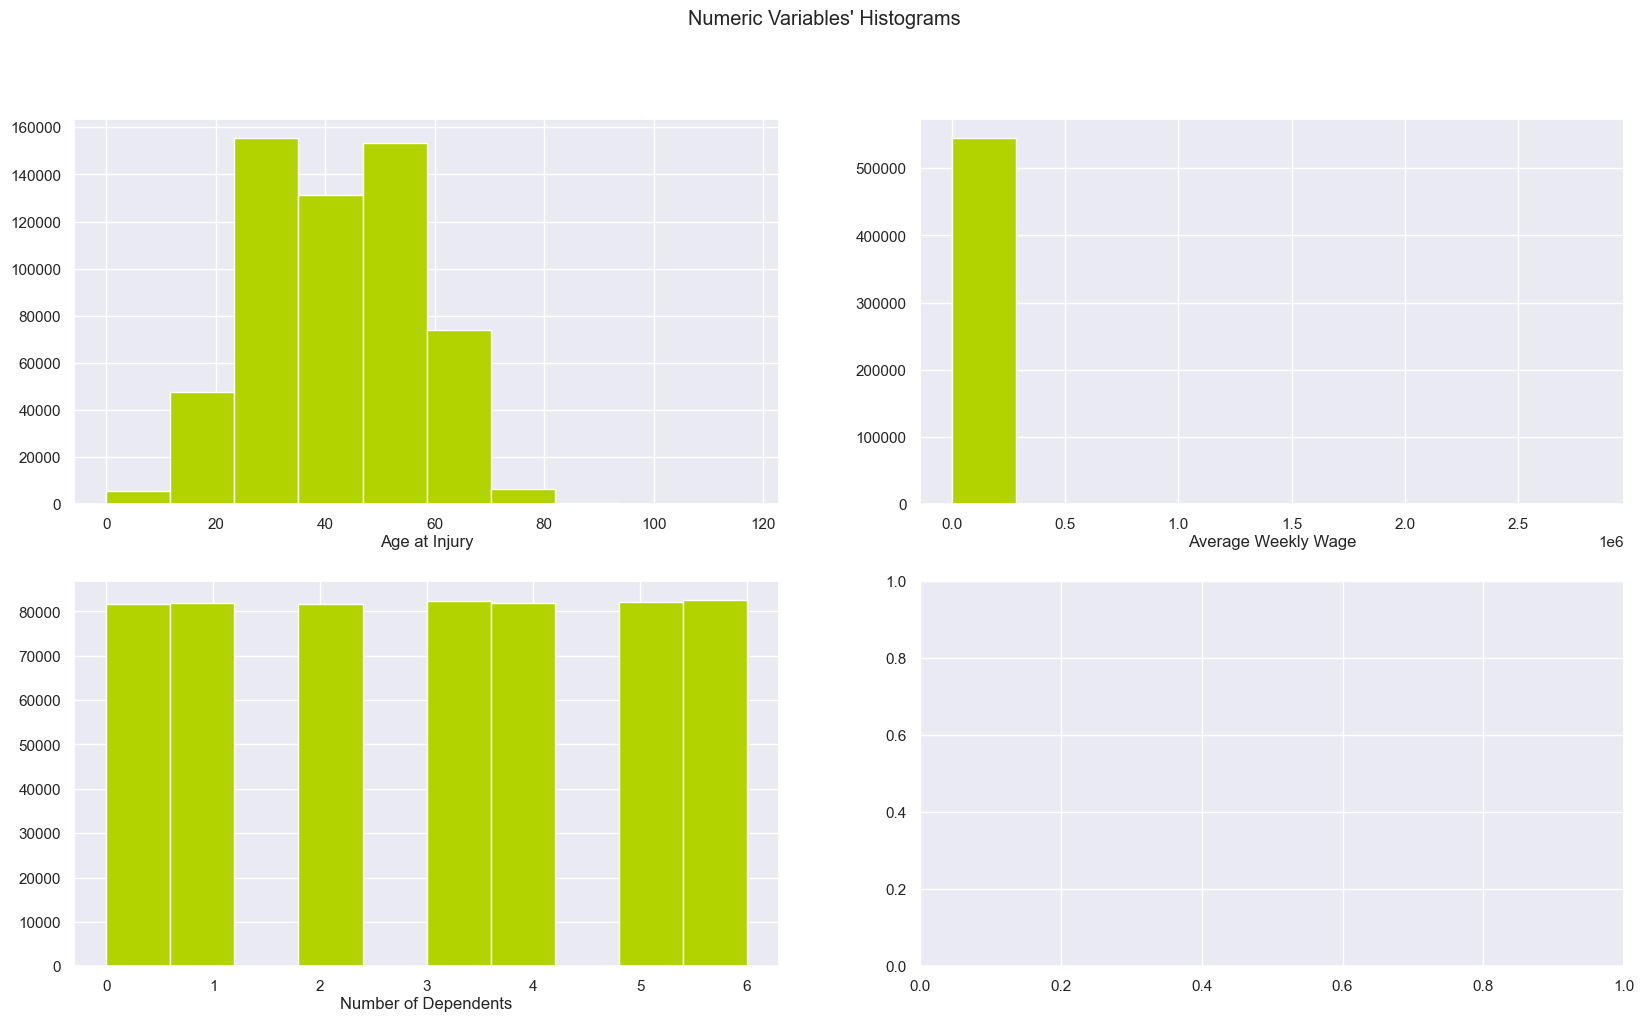

In [61]:
metric_features = ['Age at Injury', 'Average Weekly Wage', 'Number of Dependents']
df = df_train

sns.set()
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))
for ax, feat in zip(axes.flatten(), metric_features):
    ax.hist(df[feat], color= '#B2D300')
    ax.set_title(feat, y=-0.13)
plt.suptitle("Numeric Variables' Histograms")
plt.show()

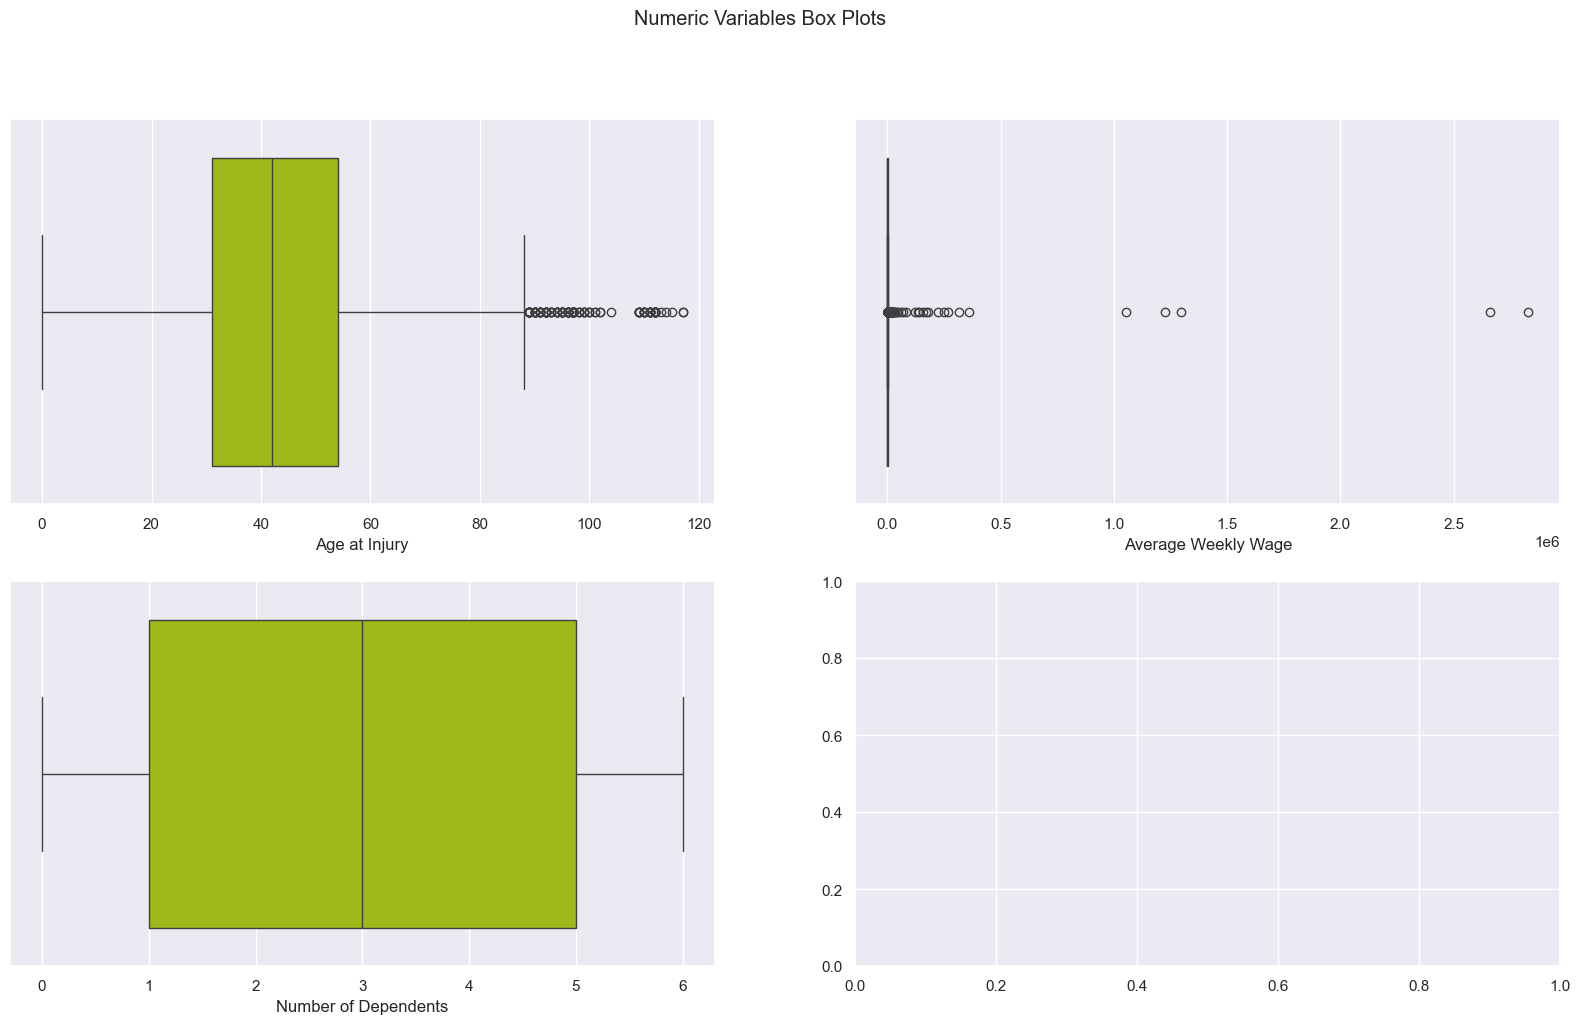

In [62]:
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(x=df[feat], ax=ax, color= '#B2D300')
plt.suptitle("Numeric Variables Box Plots")
plt.show()

Average Weekly Wage seems to be skewed, later on in the notebook more research will be conducted to understand this variable.

### Dates

Dates can yeld important insights regarding periodicity in the data (for example, tourims tends to rise in summer and lower in winter).

A plot with the frequency of accidents per year and month for every year in the data set could show these tendencies.

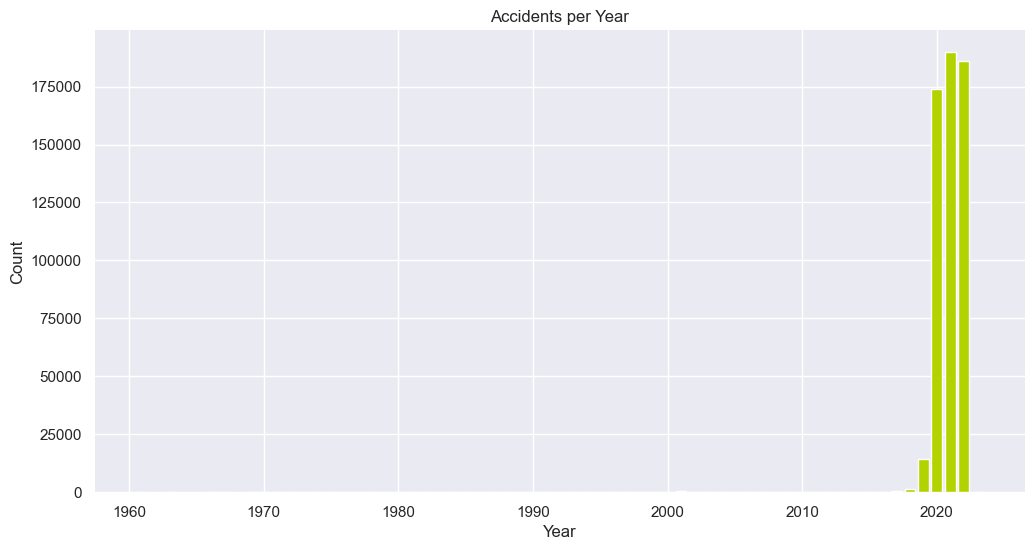

In [74]:
accidents_per_year = df_train['Accident Date'].dt.year.value_counts().sort_index()
plt.figure(figsize=(12, 6))
bars = plt.bar(accidents_per_year.index, accidents_per_year.values, color='#B2D300')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Accidents per Year')
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

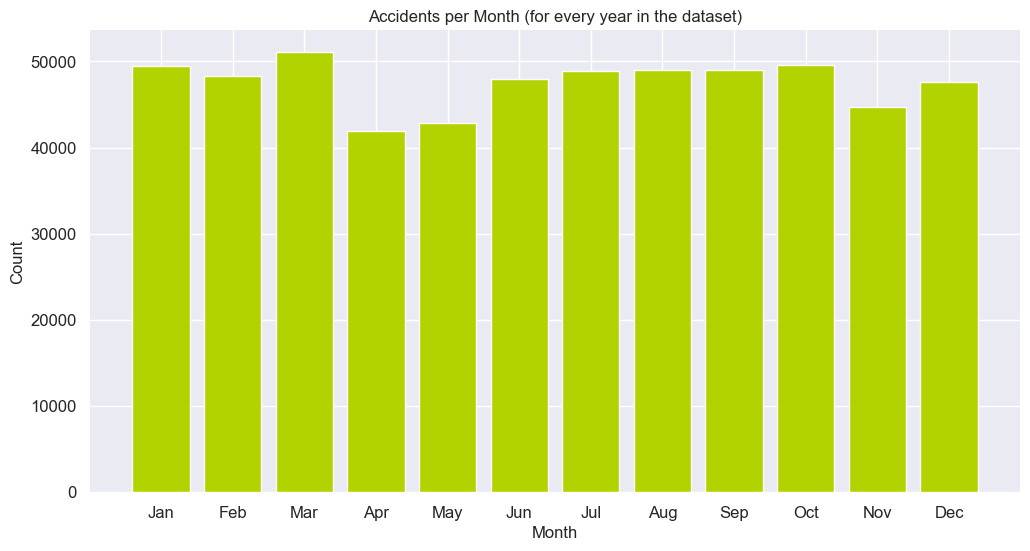

In [63]:
year_counts = df_train['Accident Date'].groupby(df_train['Accident Date'].dt.month).count()
plt.figure(figsize=(12, 6))
bars = plt.bar(year_counts.index, year_counts, color='#B2D300')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Accidents per Month (for every year in the dataset)')
plt.yticks(fontsize=12)
plt.xticks(ticks=year_counts.index, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

There seems to be a slight decrease in March and April, but most of the data regards the years of 2020, 2021 and 2021, so a plot for these years could be more revealing

In [64]:
df_train_recent = df_train[df_train['Accident Date'].dt.year.isin([2020, 2021, 2022])]

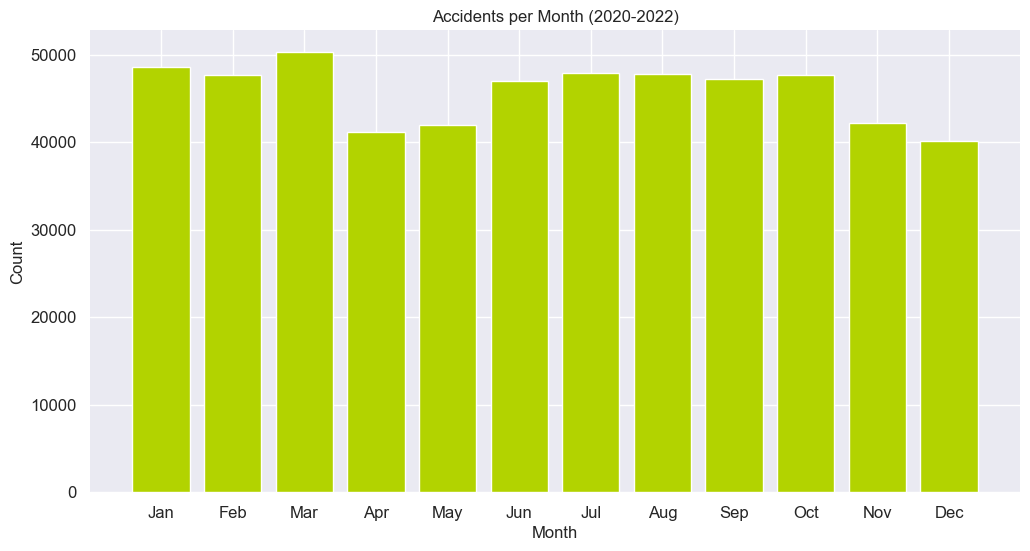

In [65]:
year_counts = df_train_recent['Accident Date'].groupby(df_train_recent['Accident Date'].dt.month).count()
plt.figure(figsize=(12, 6))
bars = plt.bar(year_counts.index, year_counts, color='#B2D300')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Accidents per Month (2020-2022)')
plt.yticks(fontsize=12)
plt.xticks(ticks=year_counts.index, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

Only decemeber seems to have changed in the recent years, showing a small decrease. To be more specific bar chart for each year can be created

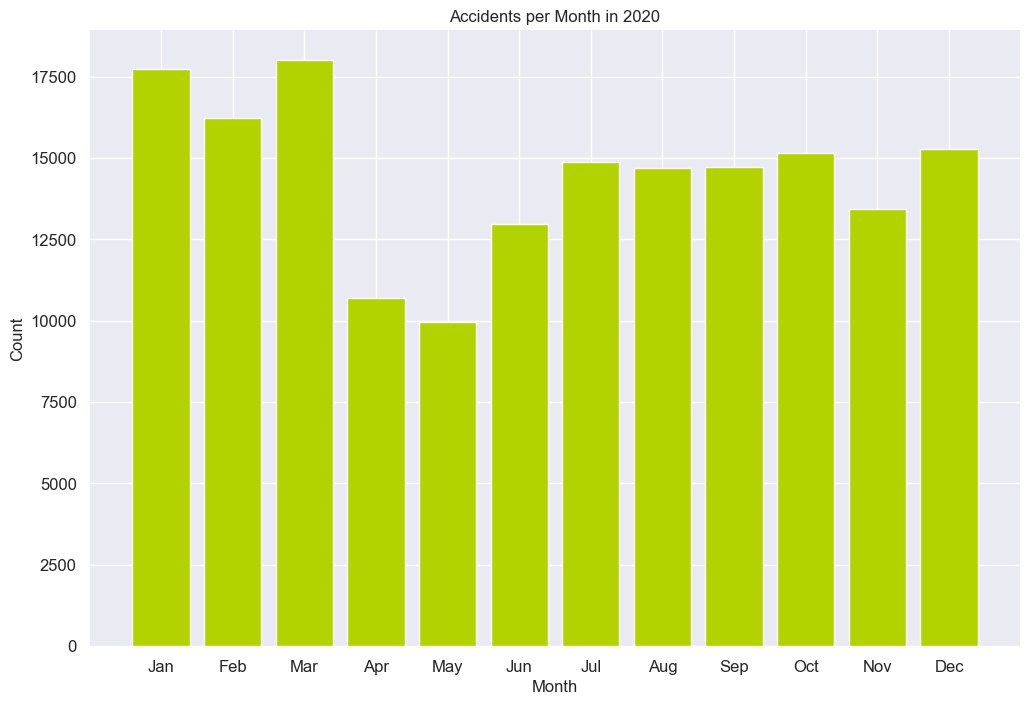

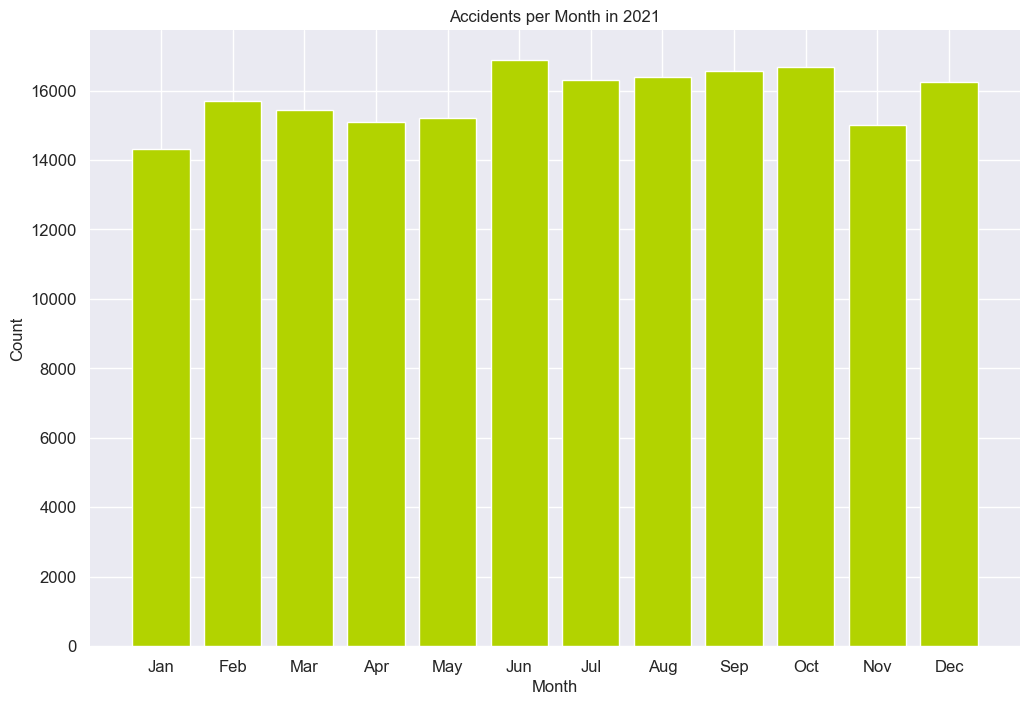

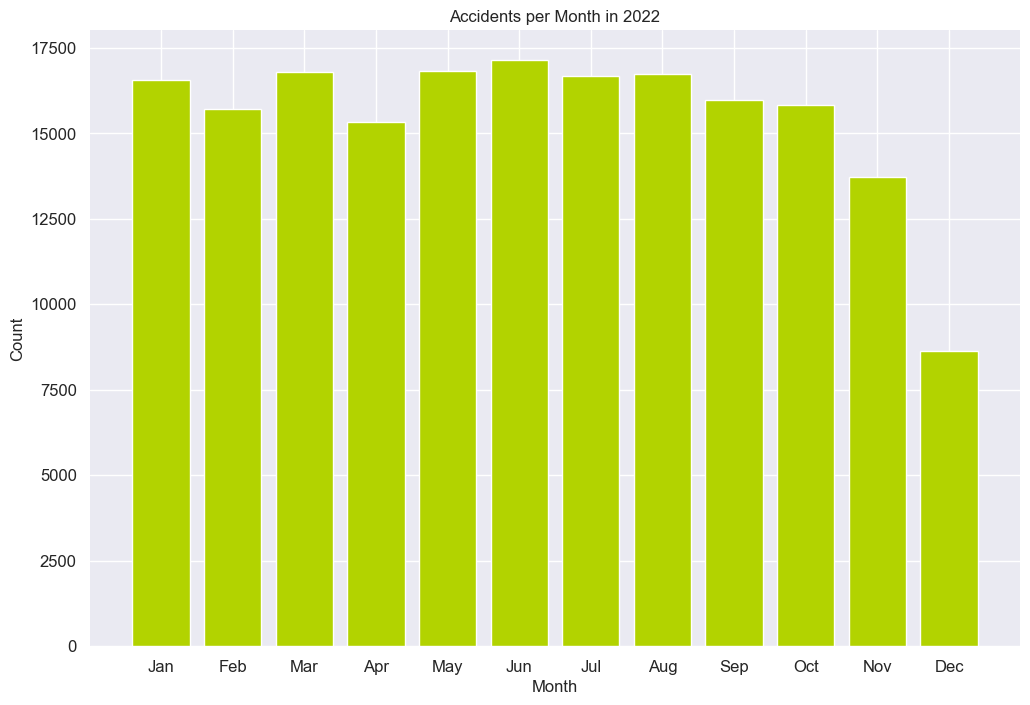

In [66]:
years_list = [2020, 2021, 2022]
for i in years_list:
    year_counts = df_train['Accident Date'][df_train['Accident Date'].dt.year == i].groupby(df_train['Accident Date'].dt.month).count()
    plt.figure(figsize=(12, 8))
    bars = plt.bar(year_counts.index, year_counts, color='#B2D300')
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.title('Accidents per Month in ' + str(i))
    plt.yticks(fontsize=12)
    plt.xticks(ticks=year_counts.index, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
    plt.grid(True)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    plt.show()

There seems to be no recognizable pattern in these years.

A look into the years before 2020, the minority subset, could explain the decrease in december in the more recent past.

In [67]:
df_train_older = df_train[df_train['Accident Date'].dt.year < 2020]

In [68]:
df_train_older

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31,N,2020-01-01,N,0.00,1988.0,2019-12-31,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,...,27,FROM LIQUID OR GREASE SPILLS,10,CONTUSION,62,BUTTOCKS,13662,0,Not Work Related,1
1,2019-08-30,46,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,...,97,REPETITIVE MOTION,49,SPRAIN OR TEAR,38,SHOULDER(S),14569,1,Not Work Related,4
2,2019-12-06,40,N,2020-01-01,N,1434.80,1979.0,2020-01-01,INDEMNITY INSURANCE CO OF,1A. PRIVATE,...,79,OBJECT BEING LIFTED OR HANDLED,7,CONCUSSION,10,MULTIPLE HEAD INJURY,12589,0,Not Work Related,6
4,2019-12-30,61,N,2020-01-01,N,NaN,1958.0,2019-12-31,STATE INSURANCE FUND,2A. SIF,...,16,"HAND TOOL, UTENSIL; NOT POWERED",43,PUNCTURE,36,FINGER(S),12603,0,Not Work Related,1
5,2019-12-26,67,N,2020-01-01,N,0.00,1952.0,2019-12-31,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,...,31,"FALL, SLIP OR TRIP, NOC",10,CONTUSION,38,SHOULDER(S),11772,0,Not Work Related,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592648,2019-09-06,109,N,2022-12-29,N,0.00,1910.0,2022-12-29,SAFETY NATIONAL CASUALTY CORP,1A. PRIVATE,...,85,ANIMAL OR INSECT,43,PUNCTURE,32,ELBOW,11212,0,Not Work Related,0
592680,2019-09-03,20,N,2022-12-29,N,0.00,1999.0,2022-12-29,EVEREST NATIONAL INS COMPANY,1A. PRIVATE,...,99,"OTHER - MISCELLANEOUS, NOC",59,"ALL OTHER SPECIFIC INJURIES, NOC",16,TEETH,11717,0,Not Work Related,6
593136,1980-05-17,45,N,2022-12-30,N,0.00,1935.0,2022-12-30,INFINITY ASSURANCE INS. CO.,1A. PRIVATE,...,29,ON SAME LEVEL,52,STRAIN OR TEAR,42,LOWER BACK AREA,11766,0,Not Work Related,1
593212,2019-07-05,21,N,2022-12-30,N,0.00,1998.0,2022-12-30,SAFETY NATIONAL CASUALTY CORP,1A. PRIVATE,...,16,"HAND TOOL, UTENSIL; NOT POWERED",40,LACERATION,34,WRIST,11706,0,Not Work Related,5


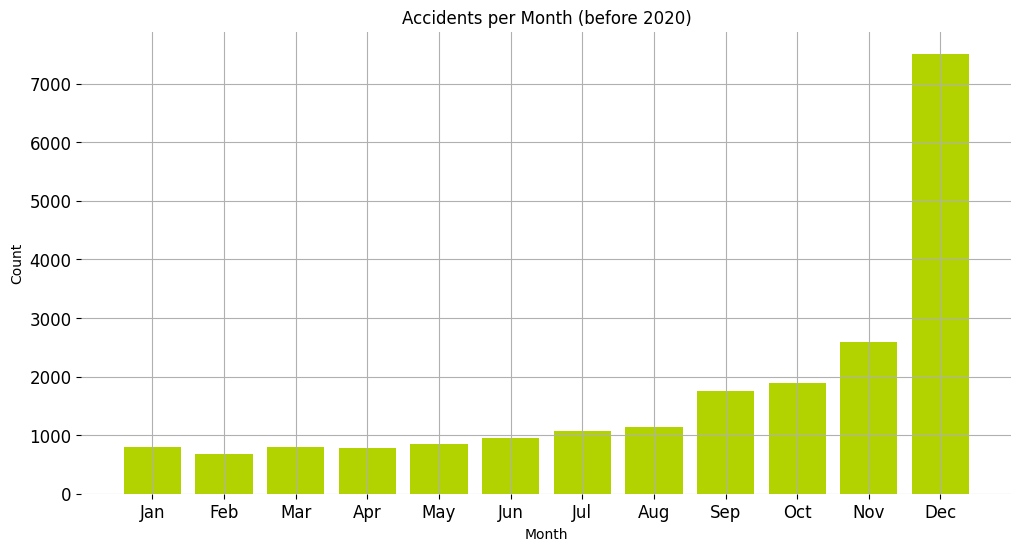

In [23]:
year_counts = df_train_older['Accident Date'].groupby(df_train_older['Accident Date'].dt.month).count()
plt.figure(figsize=(12, 6))
bars = plt.bar(year_counts.index, year_counts, color='#B2D300')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Accidents per Month (before 2020)')
plt.yticks(fontsize=12)
plt.xticks(ticks=year_counts.index, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

In [72]:
most_common_year_month = df_train_older['Accident Date'].dt.to_period('M').value_counts().idxmax()
most_common_year_month

Period('2019-12', 'M')

The explosive rise in the month of december can be explained by the the date '2019-12' which is the closest date to when the colection of data starts to grow.

### Claim Types

What are the unique values of the target variable?

In [25]:
df_train['Claim Injury Type'].unique()

array(['2. NON-COMP', '4. TEMPORARY', '3. MED ONLY', '5. PPD SCH LOSS',
       '6. PPD NSL', '1. CANCELLED', '8. DEATH', '7. PTD'], dtype=object)

This is how the target variable works:

Cancelled – The claim is canceled if it was assembled by mistake or identified as a duplicate of an existing claim.

Non-Comp – No indemnity (financial) benefits are awarded for the claim, meaning the worker is not compensated beyond the claim itself.

Med Only – Only medical benefits are awarded, covering treatment and healthcare costs without additional financial compensation for lost time.

Temporary – The claim provides temporary total or partial disability benefits for the period the worker is unable to work due to injury.

PPD Sch Loss – The claim awards a Permanent Partial Disability benefit for a scheduled body part (e.g., hand, leg) where there’s a specific schedule of compensation.

PPD NSL – The claim awards a Permanent Partial Disability benefit for a non-scheduled body part, such as the neck or back, without a specific compensation schedule.

PTD – Permanent Total Disability benefits are awarded, providing lifetime compensation because the worker is unable to return to work due to the injury.

Death – Death benefits are awarded under WCL §16 due to a worker’s death, providing financial support to dependents.

https://data.ny.gov/Government-Finance/Assembled-Workers-Compensation-Claims-Beginning-20/jshw-gkgu/about_data

How are these values distributed?

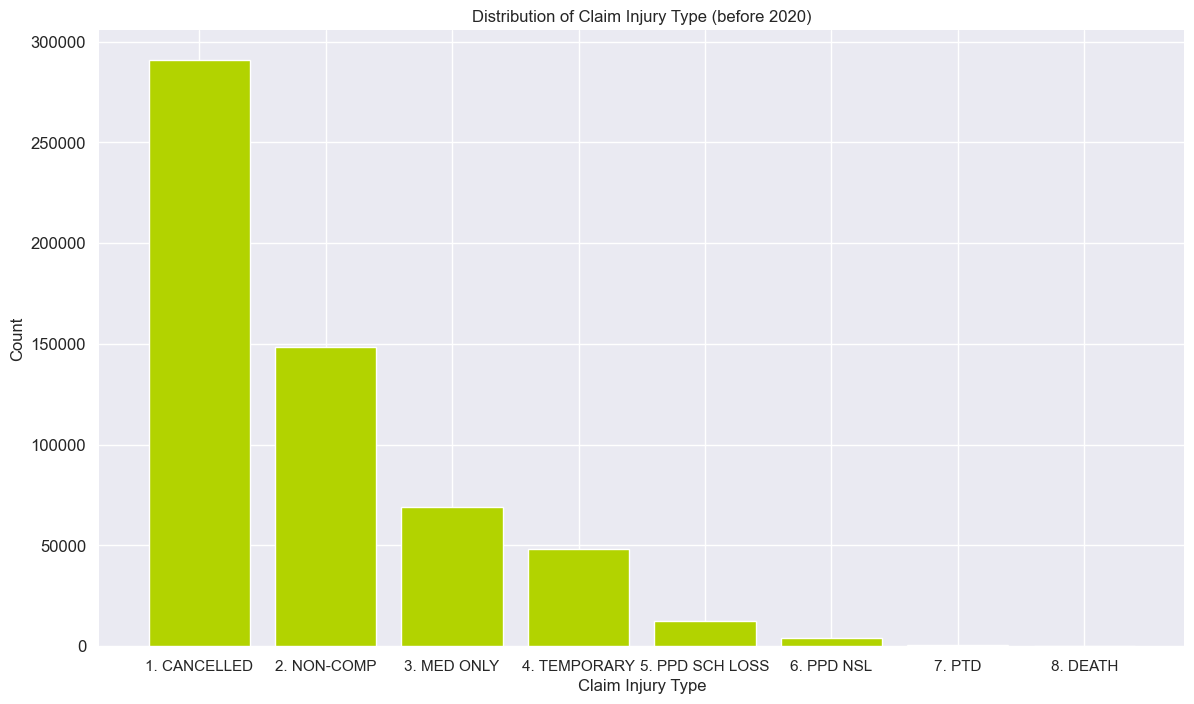

In [75]:
claim_injury_counts = df_train['Claim Injury Type'].value_counts()
plt.figure(figsize=(14, 8))
bars = plt.bar(claim_injury_counts.index, claim_injury_counts.values, color='#B2D300')
plt.xlabel('Claim Injury Type')
plt.ylabel('Count')
plt.title('Distribution of Claim Injury Type (before 2020)')
plt.yticks(fontsize=12)
plt.grid(True)
ax = plt.gca()
plt.xticks(ticks=range(len(claim_injury_counts.index)), 
               labels=sorted(claim_injury_counts.index, key=lambda x: int(x.split('.')[0])), 
               rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

### Attorney VS No Attorney

In the real world the presence of a lawyer can sometimes change the outcome of a insurance claim, how is that presence is distributed by the types of claims

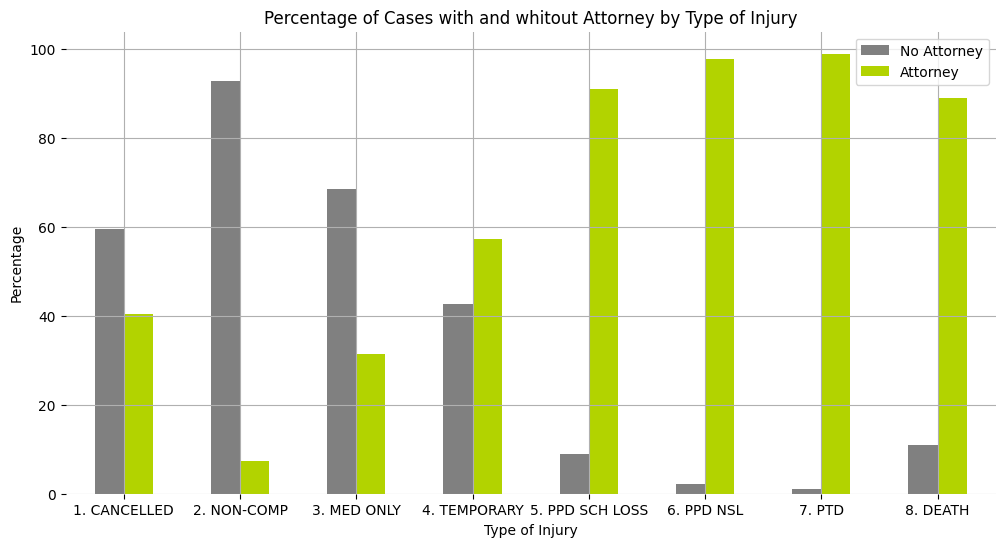

In [26]:
claim_injury_by_attorney = pd.crosstab(df_train['Claim Injury Type'], df_train['Attorney/Representative'])
claim_injury_by_attorney.columns = ['No Attorney', 'Attorney']
claim_injury_by_attorney.reset_index(inplace=True)
claim_injury_by_attorney['Attorney'] = claim_injury_by_attorney['Attorney'] / (claim_injury_by_attorney['No Attorney'] + claim_injury_by_attorney['Attorney']) * 100
claim_injury_by_attorney['No Attorney'] = 100 - claim_injury_by_attorney['Attorney']
claim_injury_by_attorney
claim_injury_by_attorney.plot(kind='bar', stacked=False, color=['Grey', '#B2D300'], figsize=(12, 6))
plt.xlabel('Type of Injury')
plt.ylabel('Percentage')
plt.title('Percentage of Cases with and whitout Attorney by Type of Injury')
plt.xticks(rotation=0)
plt.grid(True)
ax = plt.gca()
plt.xticks(ticks=range(len(claim_injury_counts.index)), 
               labels=sorted(claim_injury_counts.index, key=lambda x: int(x.split('.')[0])), 
               rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()


### Ages

To look at ages we will group them using bins, this helps visualizations become more readable

In [28]:
bins = (0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100)
df_train['age_group'] = pd.cut(df_train['Age at Injury'], bins=bins)

In [29]:
age_group_counts = df_train['age_group'].value_counts().sort_index()
age_group_counts_percentage = age_group_counts / age_group_counts.sum() * 100
age_group_table = pd.DataFrame({'Age Group': age_group_counts.index,'Count': age_group_counts.values,'Percentage': age_group_counts_percentage.values})
age_group_table['Age Group'] = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
age_group_table

,Age Group,Count,Percentage
0,0-10,18,0.003166
1,10-20,19056,3.351944
2,20-30,116489,20.490373
3,30-40,129612,22.798704
4,40-50,118033,20.761962
5,50-60,127283,22.389034
6,60-70,51167,9.000257
7,70-80,6111,1.074923
8,80-90,625,0.109937
9,90-100,112,0.019701


In [30]:
df_zeros = df_train[df_train['Age at Injury'] == 0]
df_zeros.describe()

,Accident Date,Age at Injury,Assembly Date,Average Weekly Wage,Birth Year,C-2 Date,Claim Identifier,Industry Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents
count,1775,5464.0,5464,5169.000000,5204.000000,3081,5.464000e+03,3983.0,2940.0,2937.0,2535.0,5464.0,5464.0
mean,2018-05-30 02:25:13.014084608,0.0,2021-05-19 05:29:57.364568064,70.099559,1238.161414,2021-06-11 06:30:15.774099712,5.734683e+06,50.708009,74.727891,53.292475,37.280473,0.068814,2.999817
min,1967-04-05 00:00:00,0.0,2020-01-02 00:00:00,0.000000,0.000000,1997-02-07 00:00:00,5.393794e+06,11.0,1.0,1.0,-9.0,0.0,0.0
25%,2020-01-07 00:00:00,0.0,2020-08-21 00:00:00,0.000000,0.000000,2020-10-08 00:00:00,5.541794e+06,42.0,56.0,37.0,13.0,0.0,1.0
50%,2020-09-29 00:00:00,0.0,2021-04-27 00:00:00,0.000000,1959.000000,2021-07-16 00:00:00,5.708605e+06,48.0,83.0,52.0,35.0,0.0,3.0
75%,2021-09-16 00:00:00,0.0,2022-02-03 00:00:00,0.000000,1967.000000,2022-05-03 00:00:00,5.912161e+06,62.0,98.0,72.0,53.0,0.0,5.0
max,2022-12-20 00:00:00,0.0,2022-12-30 00:00:00,5867.580000,2005.000000,2024-05-31 00:00:00,6.165637e+06,92.0,99.0,91.0,99.0,1.0,6.0
std,NaN,0.0,NaN,321.922818,949.243284,NaN,2.187567e+05,18.743996,27.188004,22.075821,26.238942,0.253161,1.980733


Most observations with 0 years of age dont have an "average weekly wage" and a sizable amount have 0 as their birth year.
For the ones who have a birth year, it is possible to calculate their age at the time of teh accident, this is something to be done in the data cleaning section.

### Genders

Lets check how the dataset is distributed in terms of gender

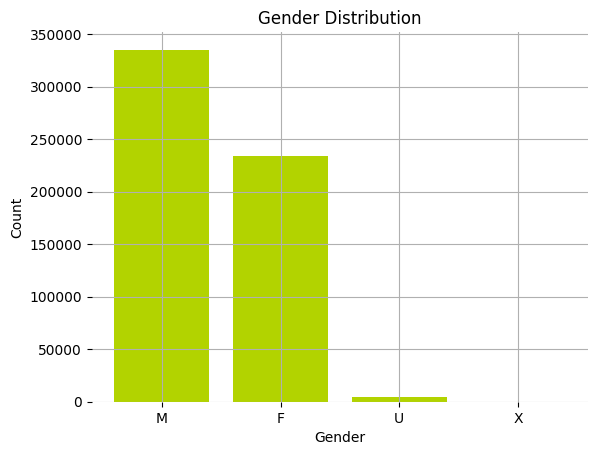

In [31]:
df_train['Gender'] = df_train['Gender'].astype(str)
gender_counts = df_train['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color='#B2D300')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

In [32]:
gender_type_of_claim = pd.crosstab(df_train['Gender'], df_train['Claim Injury Type'])
for i in gender_type_of_claim.columns:
    gender_type_of_claim[i] = (gender_type_of_claim[i] / gender_type_of_claim[i].sum()) * 100
gender_type_of_claim

Claim Injury Type,1. CANCELLED,2. NON-COMP,3. MED ONLY,4. TEMPORARY,5. PPD SCH LOSS,6. PPD NSL,7. PTD,8. DEATH
Gender,,,,,,,,
F,33.429510,44.401119,40.794706,37.794851,30.292046,40.156732,23.71134,12.765957
M,65.167909,54.539364,58.523206,61.647599,69.320630,59.534552,76.28866,87.234043
U,1.378537,1.055394,0.655966,0.554183,0.370754,0.308715,0.00000,0.000000
X,0.024044,0.004123,0.026123,0.003367,0.016570,0.000000,0.00000,0.000000


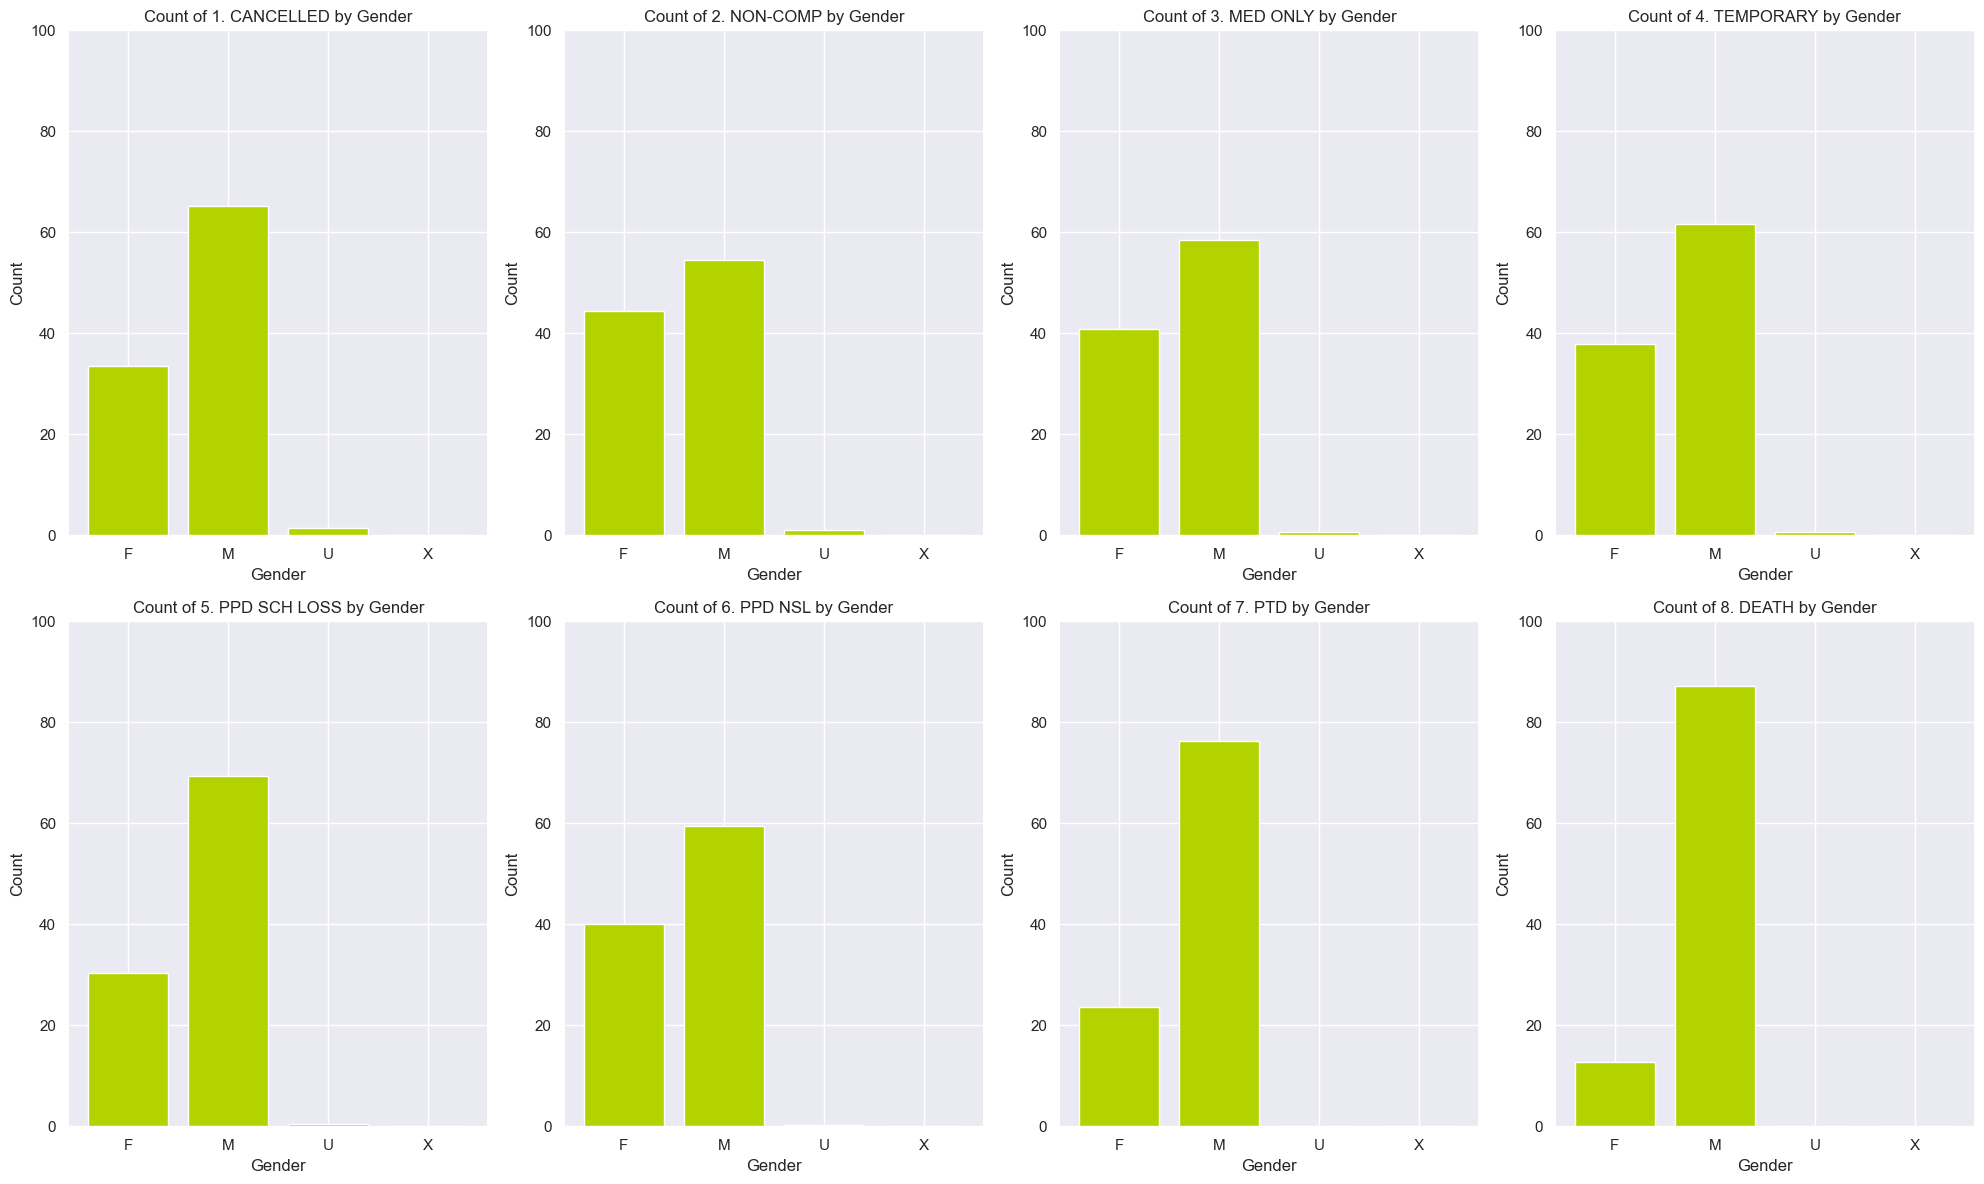

In [63]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 12))

for ax, col in zip(axes.flatten(), gender_type_of_claim.columns):
    ax.bar(gender_type_of_claim.index, gender_type_of_claim[col], color='#B2D300')
    ax.set_xlabel('Gender')
    ax.set_ylabel('Count')
    ax.set_title(f'Count of {col} by Gender')
    ax.grid(True)
    ax.set_ylim(0, 100)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.show()

### Unbalanced Columns

Two columns seem to be unbalanced lets take a look

In [34]:
covid_count = df_train['COVID-19 Indicator'].value_counts()
covid_count_percent = covid_count / covid_count.sum() * 100
decision_count = df_train['WCB Decision'].value_counts()
decision_count_percent = decision_count / decision_count.sum() * 100
print(covid_count_percent)
print(decision_count_percent)

COVID-19 Indicator
N    95.205601
Y     4.794399
Name: count, dtype: float64
WCB Decision
Not Work Related    100.0
Name: count, dtype: float64


The "COVID-19 Indicator" is composed by (roughly) 95% of cases where the claimant did **not** have covid and 5% where the claimant had **covid**. This variable is highly unbalanced, which could mean its prediction power is very low. Further research is necessary to understand the utility of this variable.

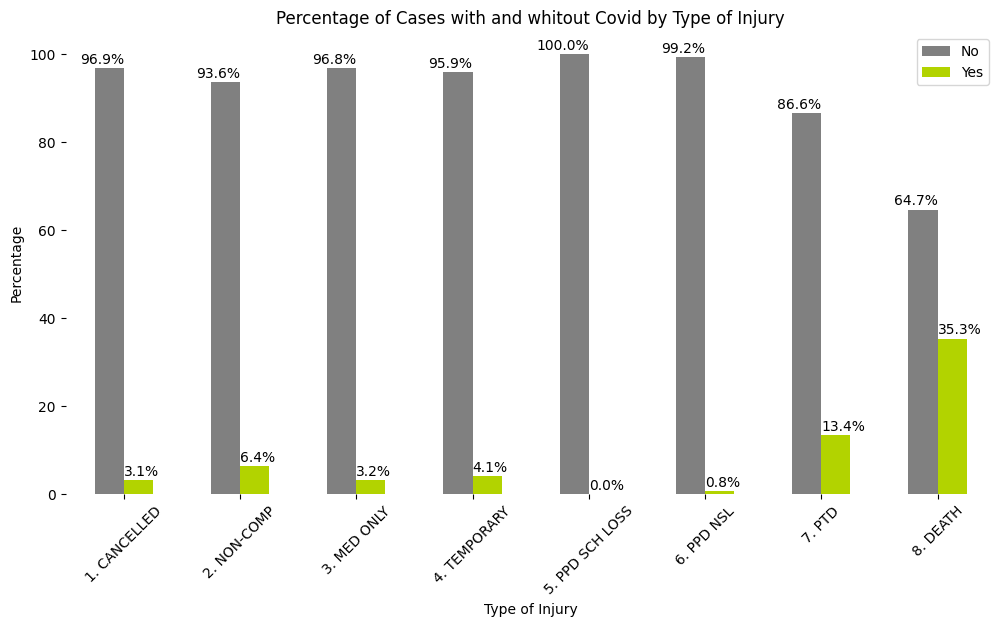

In [35]:
claim_injury_covid = pd.crosstab(df_train['Claim Injury Type'], df_train['COVID-19 Indicator'])
claim_injury_covid.columns = ['No', 'Yes']
claim_injury_covid.reset_index(inplace=True)
claim_injury_covid['Yes'] = claim_injury_covid['Yes'] / (claim_injury_covid['No'] + claim_injury_covid['Yes']) * 100
claim_injury_covid['No'] = 100 - claim_injury_covid['Yes']
claim_injury_covid
claim_injury_covid.plot(kind='bar', stacked=False, color=['Grey', '#B2D300'], figsize=(12, 6))
plt.xlabel('Type of Injury')
plt.ylabel('Percentage')
plt.title('Percentage of Cases with and whitout Covid by Type of Injury')
for index, value in enumerate(claim_injury_covid['Yes']):
    plt.text(index, value + 1, f'{value:.1f}%', ha='left', fontsize=10)
for index, value in enumerate(claim_injury_covid['No']):
    plt.text(index, value + 1, f'{value:.1f}%', ha='right', fontsize=10)
plt.xticks(ticks=claim_injury_covid.index, labels=claim_injury_covid['Claim Injury Type'], rotation=45)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

We can observe that the cases where the injury type is "DEATH" have a much higher rate of covid. There could possibly be a correlation between these variables, so at this time the Covid variable will be kept.

"WCB Decision" is composed in its entirety by "Not Work Related" cases, this variable shows no variability and therefore it is not a variable of interest, for the sake of simplicity we will remove it.

In [36]:
df_train = df_train.drop(columns=['WCB Decision'])

### Accidents Location

What about the states where the accidents happened?

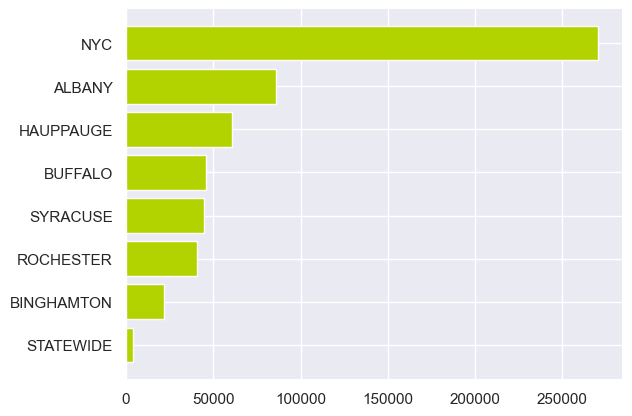

In [67]:
district_counts = df_train['District Name'].value_counts()
plt.barh(district_counts.index, district_counts.values, color='#B2D300')
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.gca().invert_yaxis()
plt.show()

Most cases happen in the region of NYC (New York City, which accounts for 5 counties) this could be due to its higher population count.

(https://worldpopulationreview.com/us-counties/new-york)

Lets take a look at how our target variable behaves in these communities

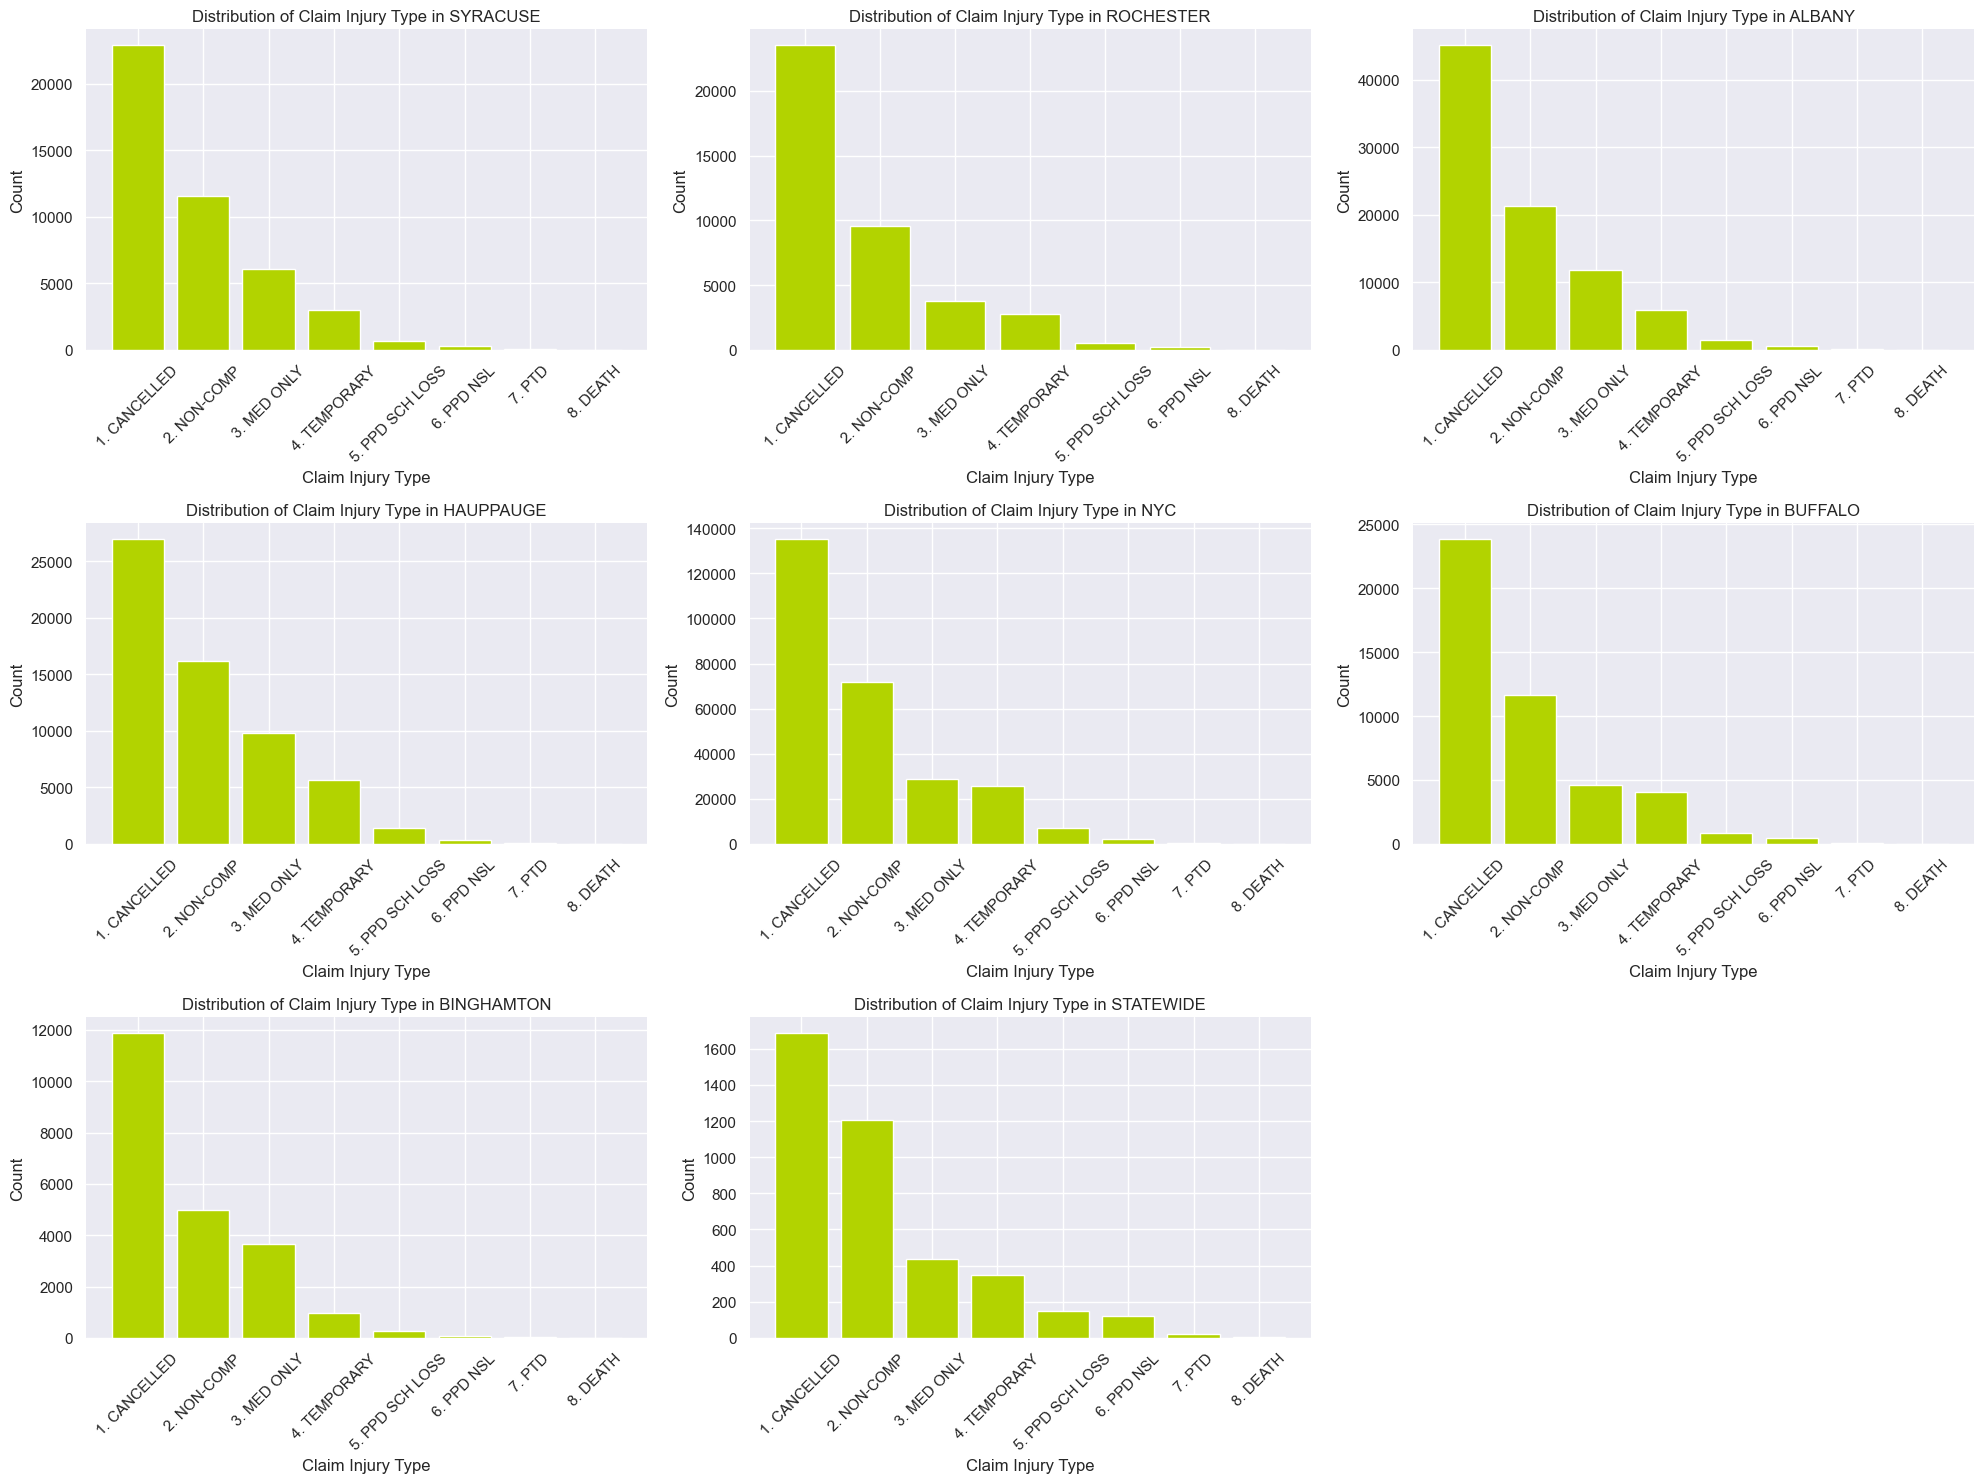

In [68]:
places = df_train['District Name'].unique()
num_places = len(places)
fig, axes = plt.subplots(nrows=ceil(num_places / 3), ncols=3, figsize=(20, 15))

for ax, place in zip(axes.flatten(), places):
    claim_injury_counts = df_train[df_train['District Name'] == place]['Claim Injury Type'].value_counts()
    bars = ax.bar(claim_injury_counts.index, claim_injury_counts.values, color='#B2D300')
    ax.set_xlabel('Claim Injury Type')
    ax.set_ylabel('Count')
    ax.set_title(f'Distribution of Claim Injury Type in {place}')
    ax.set_xticks(range(len(claim_injury_counts.index)))
    ax.set_xticklabels(sorted(claim_injury_counts.index, key=lambda x: int(x.split('.')[0])), rotation=45)
    ax.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

# Remove any empty subplots
for ax in axes.flatten()[num_places:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

### Average Weekly Wage

In [39]:
bins = (0, 1000, 2000, 3000, 4000, 5000, 10000, 20000, 30000, 40000, 50000, 100000, 200000, 300000, 400000, 500000, 1000000)
df_train['wage_groups'] = pd.cut(df_train['Average Weekly Wage'], bins=bins)

In [40]:
age_group_counts = df_train['wage_groups'].value_counts().sort_index()
age_group_counts_percentage = age_group_counts / age_group_counts.sum() * 100
age_group_table = pd.DataFrame({'Age Group': age_group_counts.index,'Count': age_group_counts.values,'Percentage': age_group_counts_percentage.values})
age_group_table['Age Group'] = ['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-10000', '10000-20000', '20000-30000', '30000-40000',
                                 '40000-50000', '50000-100000', '100000-200000', '200000-300000', '300000-400000', '400000-500000', '500000-1000000']
age_group_table

,Age Group,Count,Percentage
0,0-1000,96645,46.038967
1,1000-2000,87274,41.574886
2,2000-3000,20881,9.947123
3,3000-4000,3763,1.792588
4,4000-5000,973,0.463510
5,5000-10000,328,0.156250
6,10000-20000,29,0.013815
7,20000-30000,9,0.004287
8,30000-40000,2,0.000953
9,40000-50000,2,0.000953


We can see that roughly 86% of our data falls in the range of 0 to 2000 monetary units. Lets look further into this range and see if we find anything interesting

In [41]:
df_train1 = df_train[df_train['Average Weekly Wage'] < 3000]
bins = (0, 500, 1000, 1500, 2000, 2500, 3000)
df_train1['wage_groups'] = pd.cut(df_train1['Average Weekly Wage'], bins=bins)

C:\Users\alexr\AppData\Local\Temp\ipykernel_52992\1944115288.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train1['wage_groups'] = pd.cut(df_train1['Average Weekly Wage'], bins=bins)


In [42]:
df_train1['Average Weekly Wage'].mean()

np.float64(437.4043178023361)

In [43]:
df_testing = df_train1[df_train1['Average Weekly Wage'] == 0]

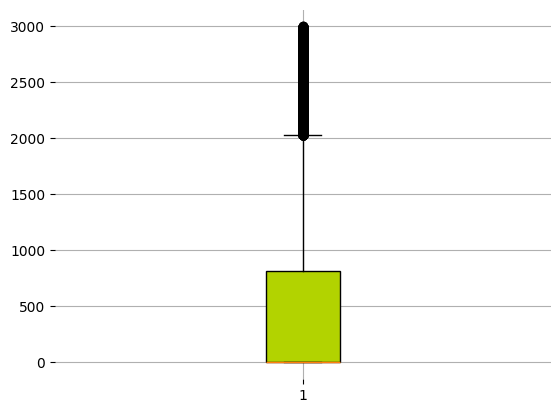

In [47]:
plt.boxplot(df_train1['Average Weekly Wage'], patch_artist=True,
            boxprops=dict(facecolor='#B2D300'))
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

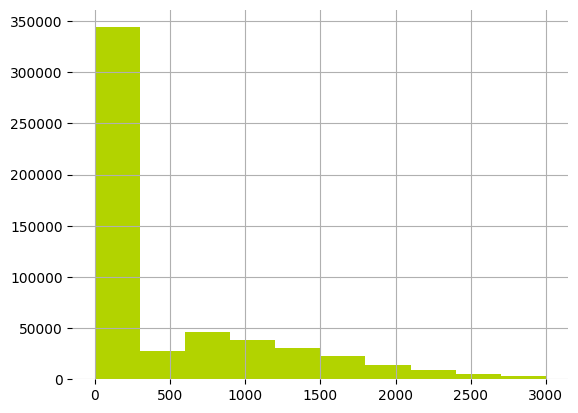

In [48]:
plt.hist(df_train1['Average Weekly Wage'], color='#B2D300')
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

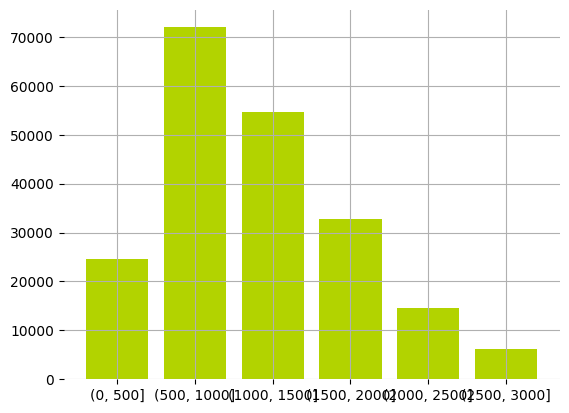

In [49]:
wage_groups_counts = df_train1['wage_groups'].value_counts().sort_index()
plt.bar(wage_groups_counts.index.astype(str), wage_groups_counts.values, color='#B2D300')
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

In [50]:
age_group_counts = df_train1['wage_groups'].value_counts().sort_index()
age_group_counts_percentage = age_group_counts / age_group_counts.sum() * 100
age_group_table = pd.DataFrame({'Age Group': age_group_counts.index,'Count': age_group_counts.values,'Percentage': age_group_counts_percentage.values})
age_group_table

,Age Group,Count,Percentage
0,"(0, 500]",24689,12.057472
1,"(500, 1000]",71956,35.141458
2,"(1000, 1500]",54601,26.665722
3,"(1500, 2000]",32673,15.956652
4,"(2000, 2500]",14666,7.162497
5,"(2500, 3000]",6176,3.016199


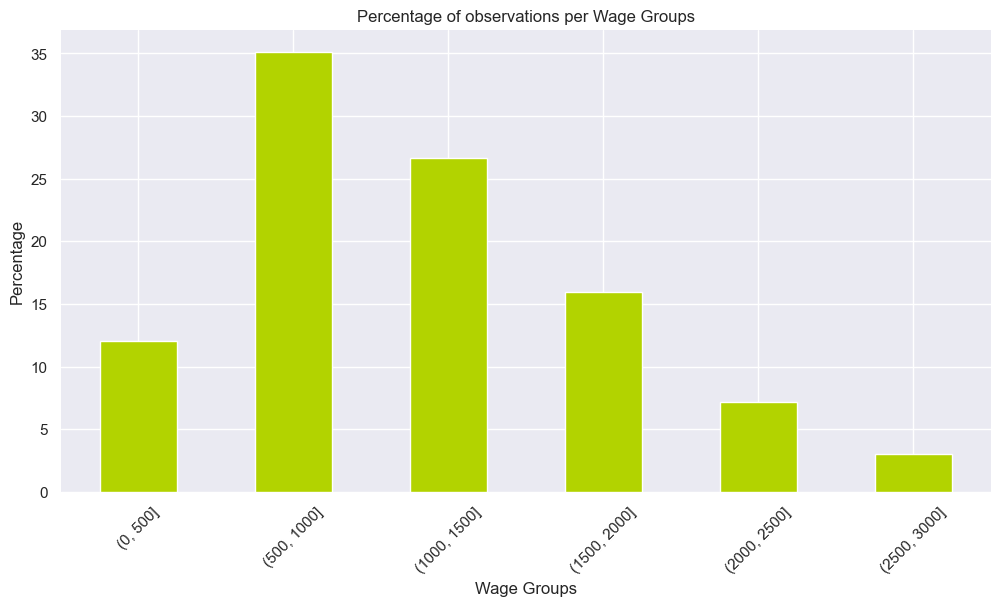

In [69]:
age_group_counts_percentage.plot(kind='bar', color='#B2D300', figsize=(12, 6))
plt.xlabel('Wage Groups')
plt.ylabel('Percentage')
plt.title('Percentage of observations per Wage Groups')
plt.xticks(rotation=45)
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

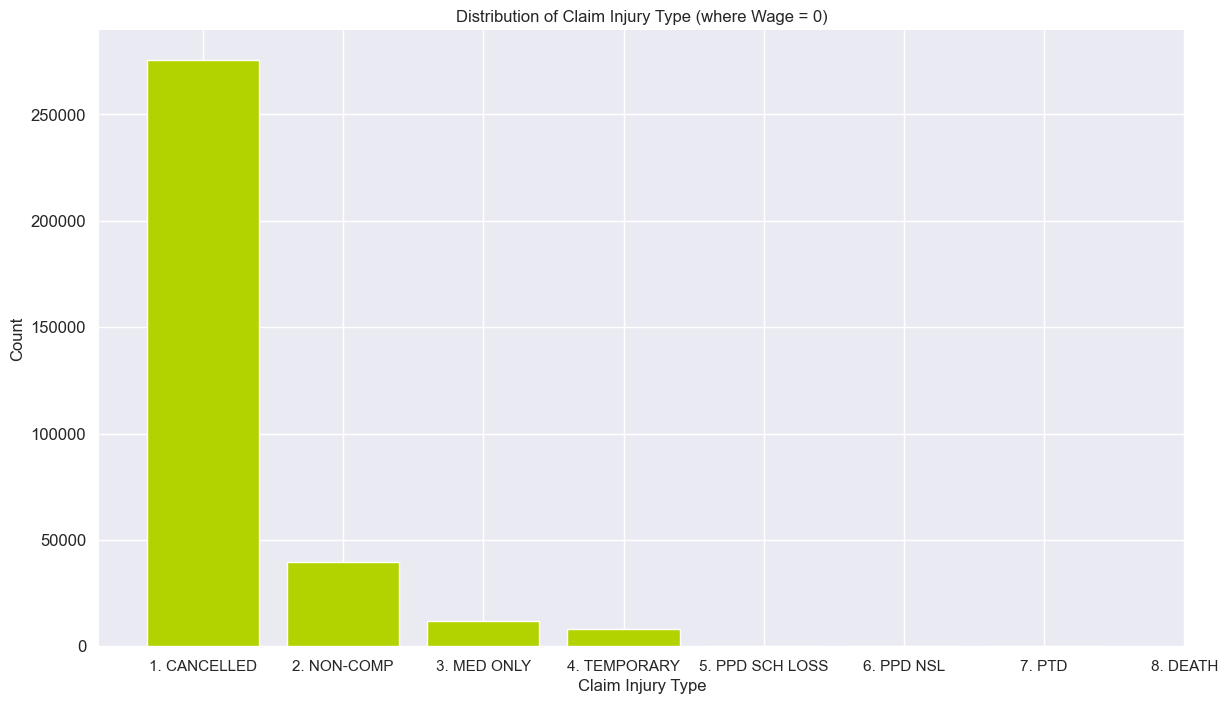

In [72]:
no_wage = df_train[df_train['Average Weekly Wage'] == 0]
no_wage_counts = no_wage['Claim Injury Type'].value_counts()
plt.figure(figsize=(14, 8))
bars = plt.bar(no_wage_counts.index, no_wage_counts.values, color='#B2D300')
plt.xlabel('Claim Injury Type')
plt.ylabel('Count')
plt.title('Distribution of Claim Injury Type (where Wage = 0)')
plt.yticks(fontsize=12)
plt.grid(True)
ax = plt.gca()
plt.xticks(ticks=range(len(claim_injury_counts.index)), 
               labels=sorted(claim_injury_counts.index, key=lambda x: int(x.split('.')[0])), 
               rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

### Body Part, Nature and Cause Codes

In the data set there are a lot of columns regarding codes (industry codes, injury codes, etc.) what can we do with these

In [79]:
unique_cause_codes = df_train[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']].drop_duplicates()
unique_nature_codes = df_train[['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description']].drop_duplicates()
unique_body_codes = df_train[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']].drop_duplicates()


In [82]:
unique_body_codes

,WCIO Part Of Body Code,WCIO Part Of Body Description
0,62,BUTTOCKS
1,38,SHOULDER(S)
2,10,MULTIPLE HEAD INJURY
4,36,FINGER(S)
8,60,LUNGS
9,14,EYE(S)
10,55,ANKLE
11,53,KNEE
12,37,THUMB
14,42,LOWER BACK AREA


#### Body Groups

We could possibly group the body codes by 5 groups:
- Head
- Torso
- Arms
- Legs
- Other (for unkown codes)

This has to be done manually

In [83]:
head = [
    "MULTIPLE HEAD INJURY", "EYE(S)", "MOUTH", "EAR(S)", "SKULL", "FACIAL BONES", 
    "TEETH", "NOSE", "BRAIN", "LARYNX", "TRACHEA", "MULTIPLE NECK INJURY"
]

torso = [
    "TORSO", "SHOULDER(S)", "LUNGS", "BUTTOCKS", "LOWER BACK AREA", "ABDOMEN INCLUDING GROIN", 
    "HIP", "CHEST", "DISC", "UPPER BACK AREA", "PELVIS", "HEART", "VERTEBRAE", 
    "LUMBAR & OR SACRAL VERTEBRAE (VERTEBRA", "SACRUM AND COCCYX", "SPINAL CORD"
]

arm = [
    "ARMS", "FINGER(S)", "THUMB", "WRIST", "HAND", "UPPER ARM", "ELBOW", "WRIST (S) & HAND(S)"
]

leg = [
    "LEGS", "ANKLE", "KNEE", "LOWER LEG", "UPPER LEG", "FOOT", "TOES", "GREAT TOE", 
    "MULTIPLE LOWER EXTREMITIES"
]

other = [
    "SPINAL CORD", "SOFT TISSUE", "MULTIPLE UPPER EXTREMITIES", "MULTIPLE BODY PARTS (INCLUDING BODY", 
    "BODY SYSTEMS AND MULTIPLE BODY SYSTEMS", "NO PHYSICAL INJURY", "MULTIPLE TRUNK", 
    "WHOLE BODY", "INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLA...", "INTERNAL ORGANS"
]


In [85]:
df_train['body_group'] = np.nan
df_train.loc[df_train['WCIO Part Of Body Description'].isin(head), 'body_group'] = 'Head'
df_train.loc[df_train['WCIO Part Of Body Description'].isin(torso), 'body_group'] = 'Torso'
df_train.loc[df_train['WCIO Part Of Body Description'].isin(arm), 'body_group'] = 'Arms'
df_train.loc[df_train['WCIO Part Of Body Description'].isin(leg), 'body_group'] = 'Legs'
df_train.loc[df_train['WCIO Part Of Body Description'].isin(other), 'body_group'] = 'Other'

C:\Users\alexr\AppData\Local\Temp\ipykernel_52992\2576631169.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Head' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_train.loc[df_train['WCIO Part Of Body Description'].isin(head), 'body_group'] = 'Head'


<BarContainer object of 5 artists>

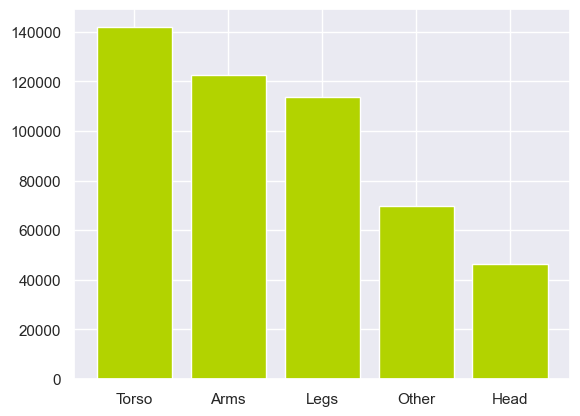

In [86]:
df_train['body_group'].value_counts()
plt.bar(df_train['body_group'].value_counts().index, df_train['body_group'].value_counts().values, color='#B2D300')

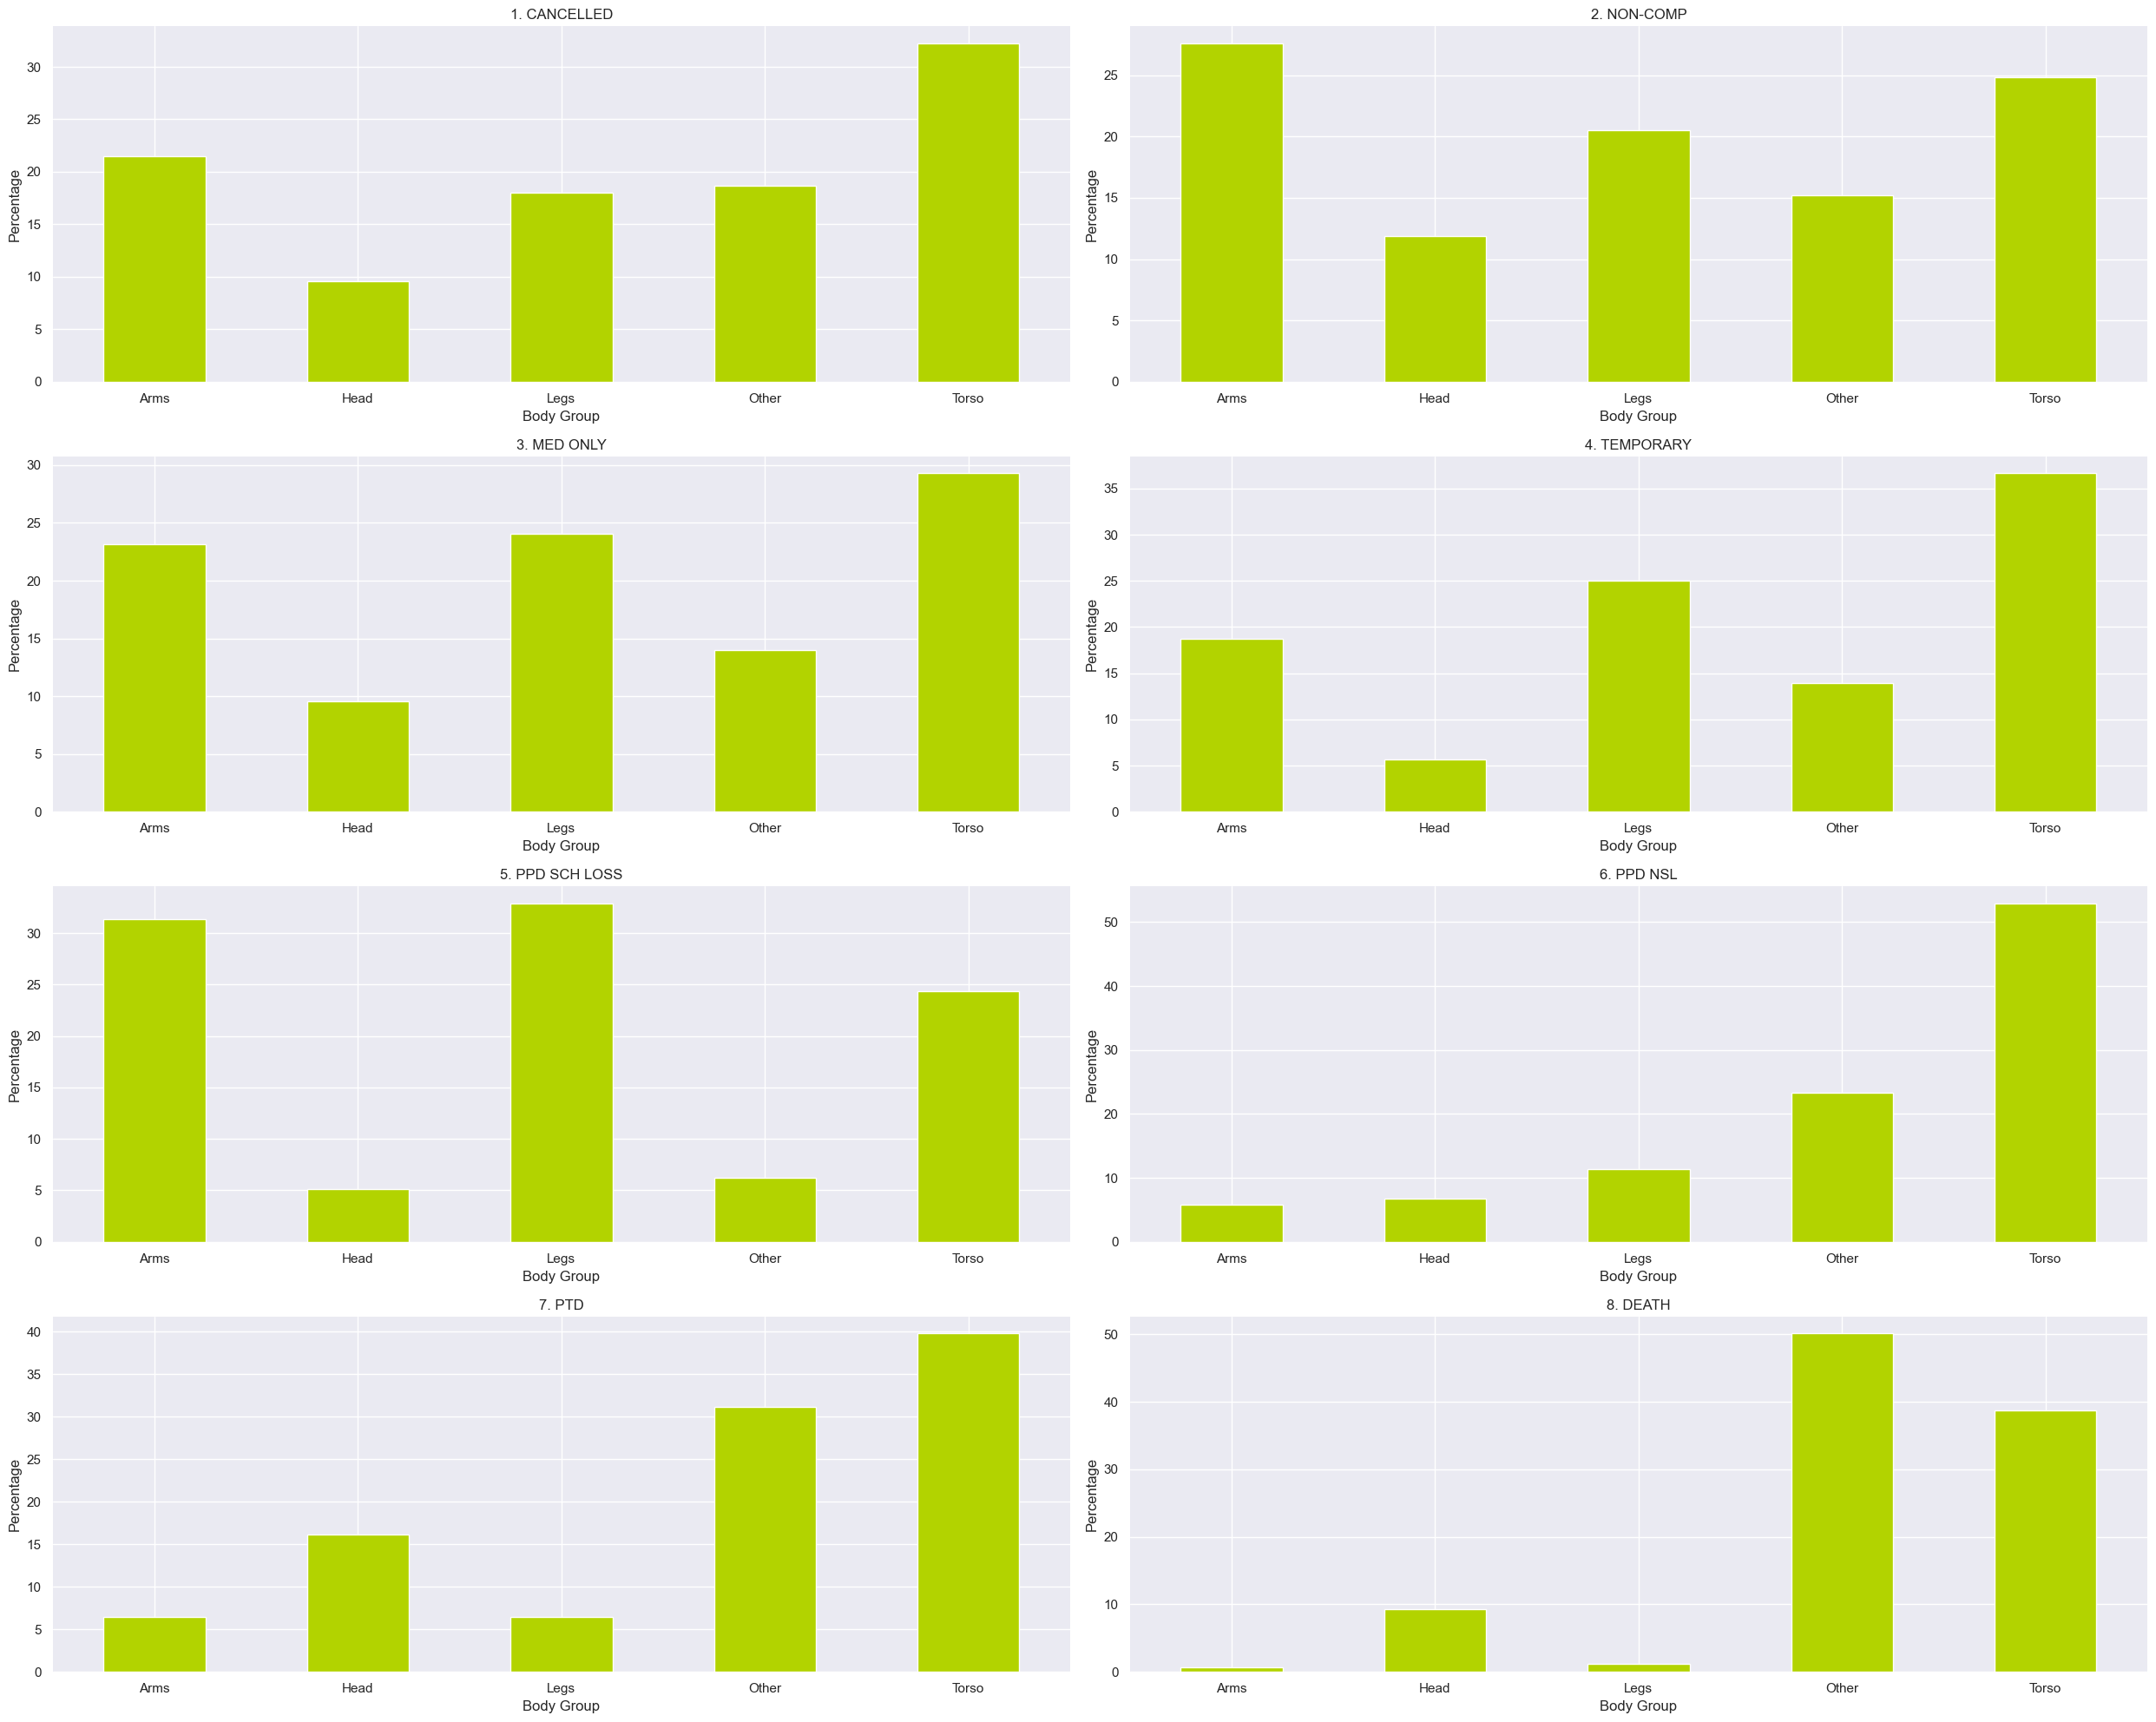

In [104]:
body_group_percentage = df_train.groupby(['Claim Injury Type', 'body_group']).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(25, 20))
axes = axes.flatten()
for ax, claim_type in zip(axes, body_group_percentage.index):
    body_group_percentage.loc[claim_type].plot(kind='bar', ax=ax, color='#B2D300')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_title(claim_type)
    ax.set_xlabel('Body Group')
    ax.set_ylabel('Percentage')
    ax.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
plt.tight_layout()
plt.show()

In [105]:
unique_nature_codes

,WCIO Nature of Injury Code,WCIO Nature of Injury Description
0,10,CONTUSION
1,49,SPRAIN OR TEAR
2,7,CONCUSSION
4,43,PUNCTURE
6,40,LACERATION
7,71,"ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC"
8,59,"ALL OTHER SPECIFIC INJURIES, NOC"
11,37,INFLAMMATION
12,4,BURN
13,52,STRAIN OR TEAR


#### Injury Nature

We can do the same for the diseases, grouping them will reduce their dimensionality. We can group them as follows:
- External Physical Trauma (caused by direct impact, injury, or physical force)
- Chronic and Repetitive Stress Injuries (due to repetitive motion or long-term strain)
- Cumulative and Occupational Injuries (work-related conditions or cumulative injuries)
- Infectious Diseases (disease or infection-related injuries)
- Poisoning and Chemical Exposure (injuries related to toxic substances or reactions)
- Cardiovascular and Respiratory Conditions (heart, lung, and vascular system-related)
- Neurological and Sensory Conditions (affecting the nervous system, vision, or hearing)
- Mental Health and Stress-Related Conditions (psychological or emotional conditions)
- Other (Multiple injuries and special/rare conditions combined)

Again, this needs to be done manually and in the case of some injuries, research is necessary.

In [96]:
physical_trauma = ["CONTUSION", "SPRAIN OR TEAR", "CONCUSSION", "PUNCTURE", "LACERATION", "BURN", 
                   "STRAIN OR TEAR", "FRACTURE", "FOREIGN BODY", "RUPTURE", "DISLOCATION", "CRUSHING", 
                   "SEVERANCE", "ELECTRIC SHOCK", "AMPUTATION"]

repetitive_stress_injuries = ["INFLAMMATION", "CARPAL TUNNEL SYNDROME", "HERNIA", "VDT - RELATED DISEASES"]

cumulative_occupational_injuries = ["ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC", "ALL OTHER SPECIFIC INJURIES, NOC", "ALL OTHER CUMULATIVE INJURY, NOC", 
                                    "DUST DISEASE, NOC", "ASBESTOSIS", "SILICOSIS", "BLACK LUNG", "BYSSINOSIS"]

infectious_diseases = ["INFECTION", "COVID-19", "CONTAGIOUS DISEASE", "HEPATITIS C", "AIDS"]

poisoning_chemical_exposure = ["POISONING - GENERAL (NOT OD OR CUMULATIVE)", "POISONING - CHEMICAL, (OTHER THAN METALS)", "POISONING - METAL", "RADIATION", "ADVERSE REACTION TO A VACCINATION OR INOCULATION"]

cardiovascular_respiratory = ["ANGINA PECTORIS", "MYOCARDIAL INFARCTION", "RESPIRATORY DISORDERS", 
                              "VASCULAR", "ASPHYXIATION", "HEAT PROSTRATION"]

neurological_sensory = ["HEARING LOSS OR IMPAIRMENT", "LOSS OF HEARING", "VISION LOSS", 
                        "ENUCLEATION", "SYNCOPE"]

mental_health_stress = ["MENTAL STRESS", "MENTAL DISORDER"]

other = ["MULTIPLE PHYSICAL INJURIES ONLY", "MULTIPLE INJURIES INCLUDING BOTH PHYSICAL AND PSYCHOLOGICAL", 
         "FREEZING", "RADIATION", "ADVERSE REACTION TO A VACCINATION OR INOCULATION"]


In [98]:
df_train['injury_type'] = np.nan
df_train.loc[df_train['WCIO Nature of Injury Description'].isin(physical_trauma), 'injury_type'] = 'Physical Trauma'
df_train.loc[df_train['WCIO Nature of Injury Description'].isin(repetitive_stress_injuries), 'injury_type'] = 'Repetitive Stress Injuries'
df_train.loc[df_train['WCIO Nature of Injury Description'].isin(cumulative_occupational_injuries), 'injury_type'] = 'Cumulative Occupational Injuries'
df_train.loc[df_train['WCIO Nature of Injury Description'].isin(infectious_diseases), 'injury_type'] = 'Infectious Diseases'
df_train.loc[df_train['WCIO Nature of Injury Description'].isin(poisoning_chemical_exposure), 'injury_type'] = 'Poisoning/Chemical Exposure'
df_train.loc[df_train['WCIO Nature of Injury Description'].isin(cardiovascular_respiratory), 'injury_type'] = 'Cardiovascular/Respiratory'
df_train.loc[df_train['WCIO Nature of Injury Description'].isin(neurological_sensory), 'injury_type'] = 'Neurological/Sensory'
df_train.loc[df_train['WCIO Nature of Injury Description'].isin(mental_health_stress), 'injury_type'] = 'Mental Health/Stress'
df_train.loc[df_train['WCIO Nature of Injury Description'].isin(other), 'injury_type'] = 'Other'

C:\Users\alexr\AppData\Local\Temp\ipykernel_52992\1182038614.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Physical Trauma' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_train.loc[df_train['WCIO Nature of Injury Description'].isin(physical_trauma), 'injury_type'] = 'Physical Trauma'


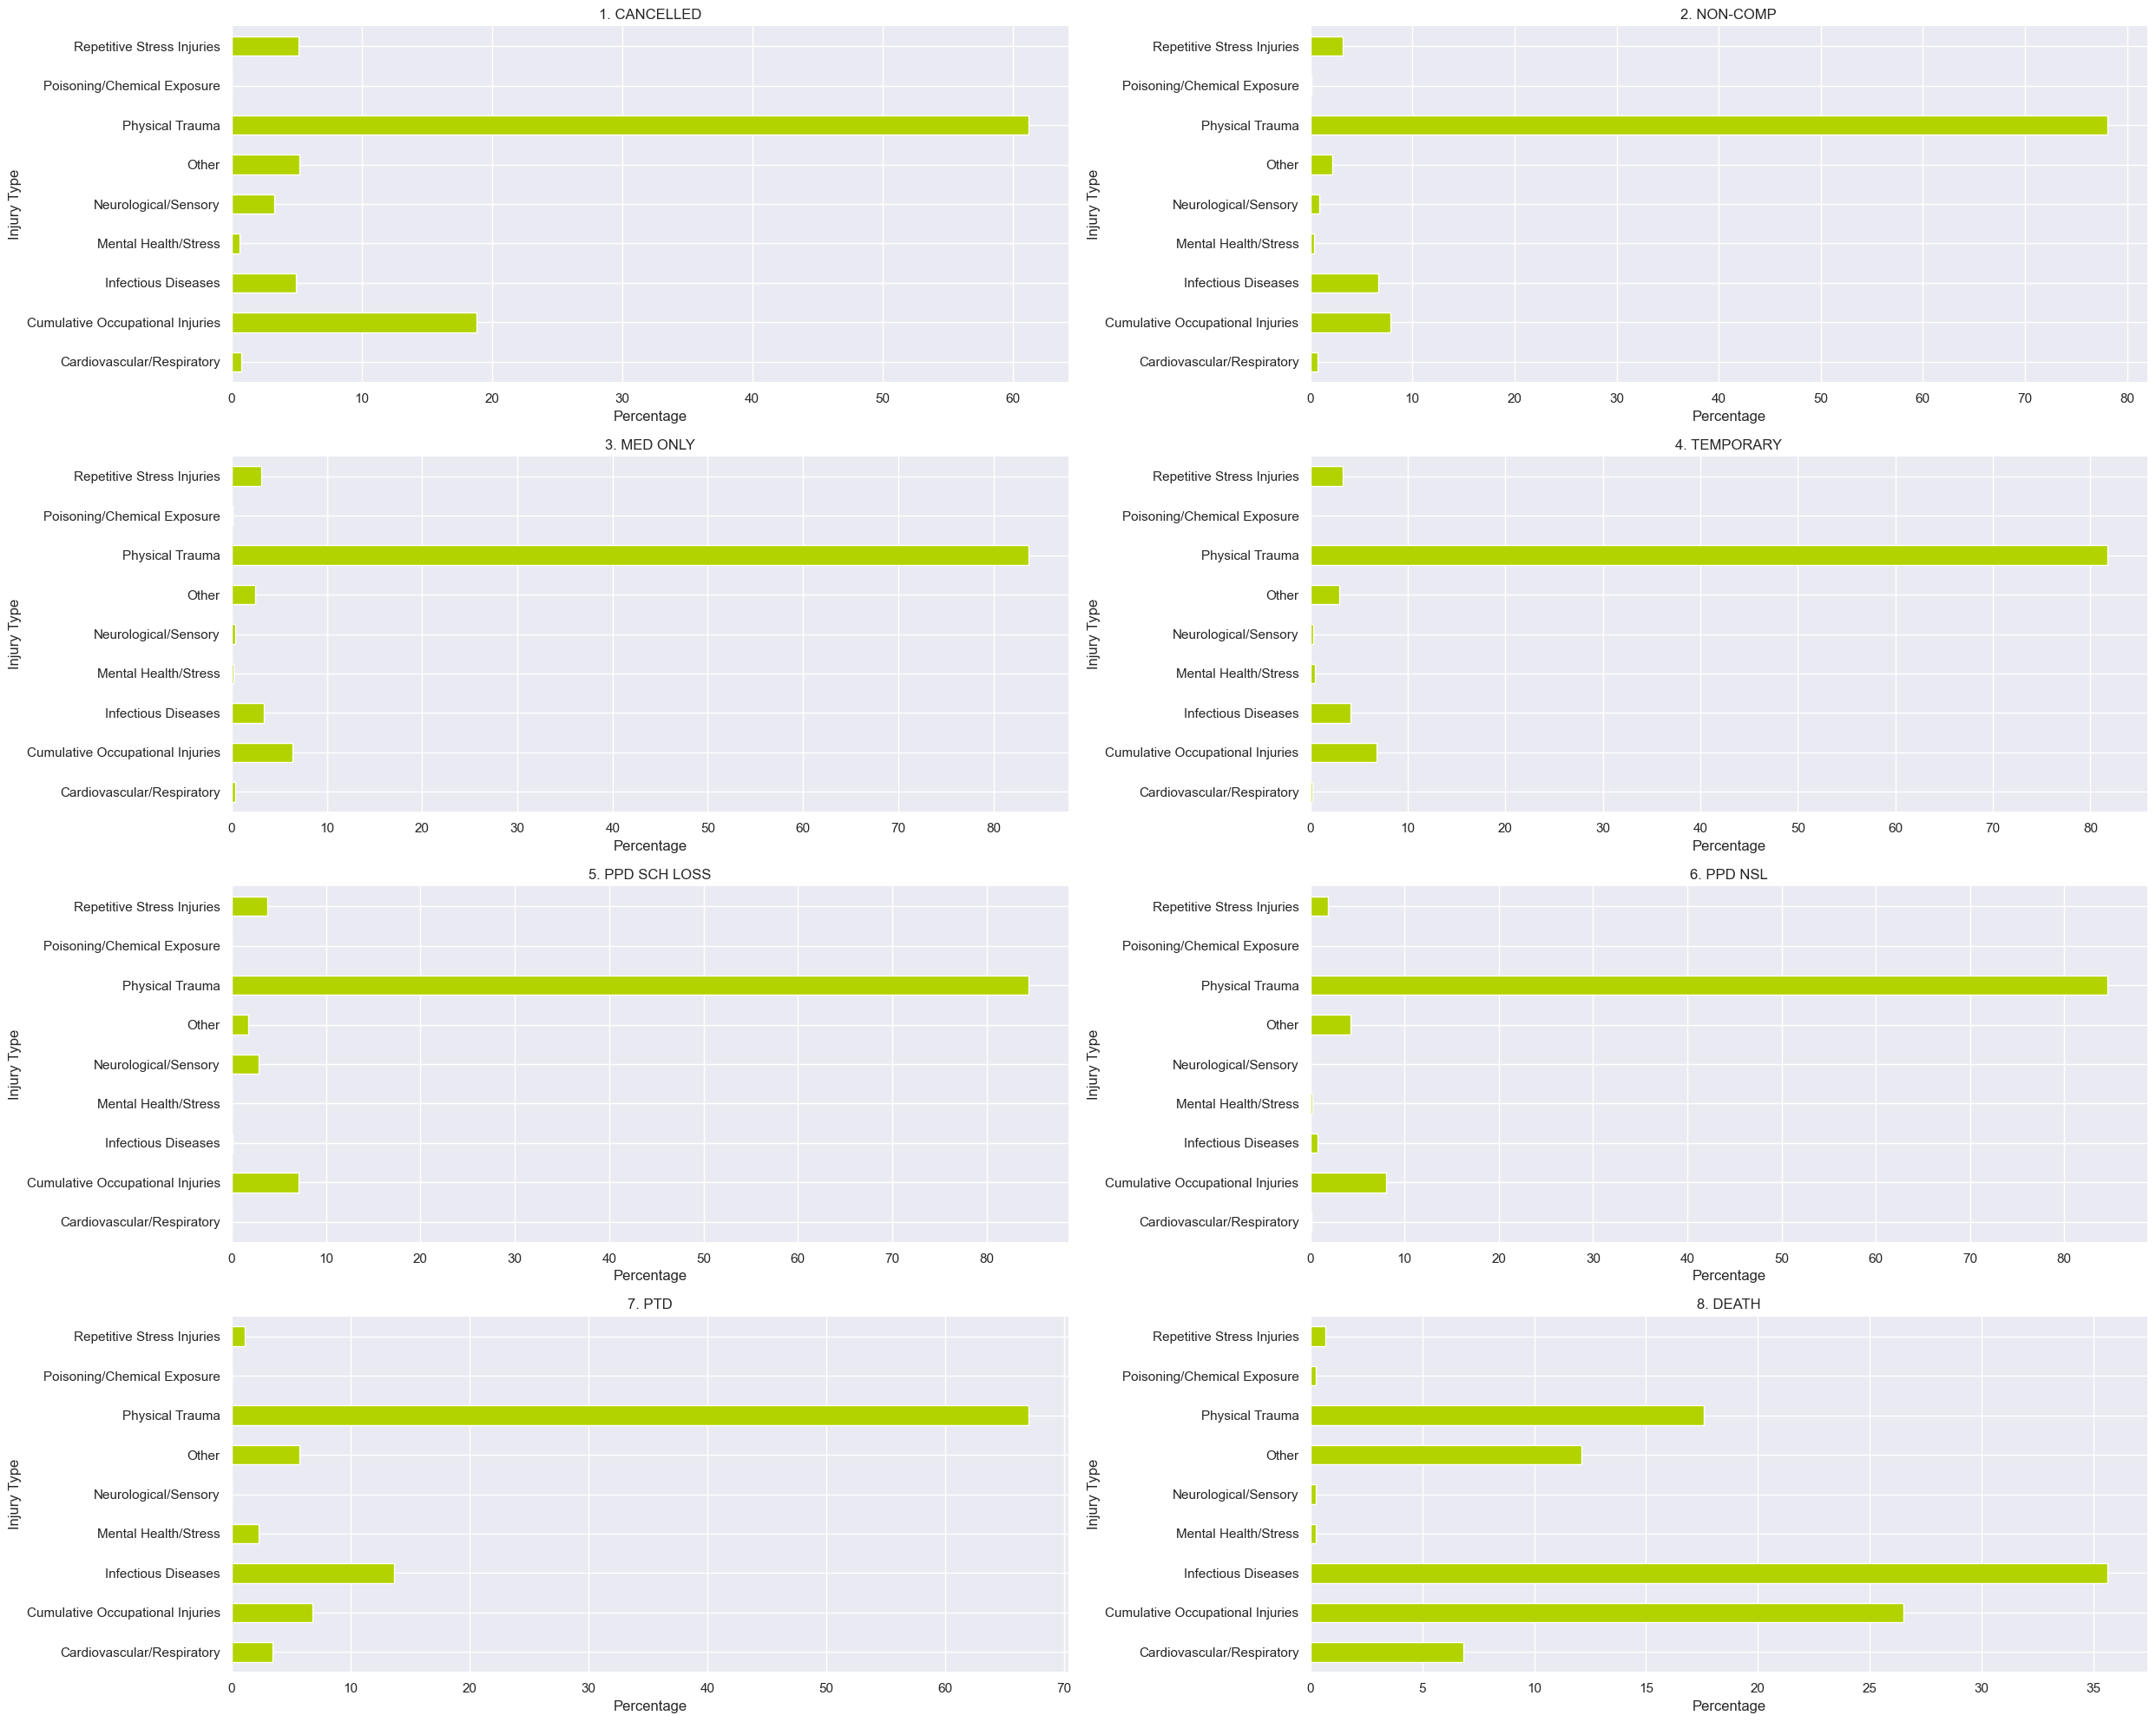

In [103]:
body_group_percentage = df_train.groupby(['Claim Injury Type', 'injury_type']).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(25, 20))
axes = axes.flatten()
for ax, claim_type in zip(axes, body_group_percentage.index):
    body_group_percentage.loc[claim_type].plot(kind='barh', ax=ax, color='#B2D300')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    ax.set_title(claim_type)
    ax.set_ylabel('Injury Type')
    ax.set_xlabel('Percentage')
    ax.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
plt.tight_layout()
plt.show()

In [114]:
for i in unique_cause_codes['WCIO Cause of Injury Description']:
    print(i)

FROM LIQUID OR GREASE SPILLS
REPETITIVE MOTION
OBJECT BEING LIFTED OR HANDLED
HAND TOOL, UTENSIL; NOT POWERED
FALL, SLIP OR TRIP, NOC
CUT, PUNCTURE, SCRAPE, NOC
OTHER - MISCELLANEOUS, NOC
STRUCK OR INJURED, NOC
FALLING OR FLYING OBJECT
CHEMICALS
COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE
LIFTING
TWISTING
ON SAME LEVEL
STRAIN OR INJURY BY, NOC
MOTOR VEHICLE, NOC
FROM DIFFERENT LEVEL (ELEVATION)
PUSHING OR PULLING
FOREIGN MATTER (BODY) IN EYE(S)
FELLOW WORKER, PATIENT OR OTHER PERSON
STEAM OR HOT FLUIDS
STATIONARY OBJECT
ON ICE OR SNOW
ABSORPTION, INGESTION OR INHALATION, NOC
PERSON IN ACT OF A CRIME
OBJECT BEING LIFTED OR HANDLED
INTO OPENINGS
ON STAIRS
FROM LADDER OR SCAFFOLDING
SLIP, OR TRIP, DID NOT FALL
JUMPING OR LEAPING
OBJECT BEING LIFTED OR HANDLED
MOTOR VEHICLE
RUBBED OR ABRADED, NOC
REACHING
OBJECT HANDLED
HOT OBJECTS OR SUBSTANCES
ELECTRICAL CURRENT
HOLDING OR CARRYING
CAUGHT IN, UNDER OR BETWEEN, NOC
nan
FIRE OR FLAME
CUMULATIVE, NOC
POWERED HAND TOOL, APPLIANCE
STRIKING AG

#### Cause of Injury

Lastly we can group the causes of the accidents:
- Slips, Trips, and Falls (related to losing balance or falling)
- Lifting, Carrying, and Handling (injuries related to lifting or handling objects)
- Struck by or Contact with Objects (injuries from being hit or coming into contact with objects)
- Vehicle and Machinery Accidents (related to collisions, crashes, or machine injuries)
- Chemical, Environmental, and Biological Hazards (exposure to harmful substances or environments)
- Manual Tools and Physical Operations (injuries caused by tools or physical operations)
- Repetitive Motion and Strain (injuries from repeated actions or excessive strain)
- Miscellaneous Causes (other causes that don’t fit into the above categories)

Note: 'NOC' means 'Not Otherwise Classified', this code is used for observations that don't fit into a specific claissification/category. 'FALL, SLIP OR TRIP, NOC' means it is a fall, slip or trip that does not fit in the categories present in the list such as snow or stairs.

https://workinjuryrights.com/glossary/not-otherwise-classified-noc/

In [111]:
slips_trips_falls = ["FROM LIQUID OR GREASE SPILLS", "FALL, SLIP OR TRIP, NOC", "ON SAME LEVEL", "FROM DIFFERENT LEVEL (ELEVATION)", 
                     "ON ICE OR SNOW", "INTO OPENINGS", "ON STAIRS", "FROM LADDER OR SCAFFOLDING", "SLIP, OR TRIP, DID NOT FALL", 
                     "JUMPING OR LEAPING"]

lifting_carrying_handling = ["OBJECT BEING LIFTED OR HANDLED", "LIFTING", "PUSHING OR PULLING", "HOLDING OR CARRYING", 
                             "OBJECT HANDLED", "OBJECT HANDLED BY OTHERS"]

struck_by_or_contact = ["STRUCK OR INJURED, NOC", "FALLING OR FLYING OBJECT", "STEAM OR HOT FLUIDS", 
                        "STATIONARY OBJECT", "ELECTRICAL CURRENT", "HOT OBJECTS OR SUBSTANCES", 
                        "CAUGHT IN, UNDER OR BETWEEN, NOC", "FIRE OR FLAME", "CONTACT WITH, NOC", 
                        "BROKEN GLASS", "STEPPING ON SHARP OBJECT", "GUNSHOT", "ANIMAL OR INSECT"]

vehicle_machinery_accidents = ["COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE", "MOTOR VEHICLE, NOC", "MOTOR VEHICLE", "VEHICLE UPSET", "COLLISION WITH A FIXED OBJECT", 
                               "CRASH OF RAIL VEHICLE", "CRASH OF WATER VEHICLE", "CRASH OF AIRPLANE", "MOVING PARTS OF MACHINE", "MACHINE OR MACHINERY", "POWERED HAND TOOL, APPLIANCE", 
                               "USING TOOL OR MACHINERY", "MOVING PART OF MACHINE", "HAND TOOL OR MACHINE IN USE"]

chemical_environmental_biological = ["CHEMICALS", "DUST, GASES, FUMES OR VAPORS", "ABSORPTION, INGESTION OR INHALATION, NOC", 
                                     "MOLD", "CUMULATIVE, NOC", "TEMPERATURE EXTREMES", "COLD OBJECTS OR SUBSTANCES", "RADIATION", 
                                     "ABNORMAL AIR PRESSURE"]

manual_tools_operations = ["HAND TOOL, UTENSIL; NOT POWERED", "CUT, PUNCTURE, SCRAPE, NOC", "RUBBED OR ABRADED, NOC", 
                           "SANDING, SCRAPING, CLEANING OPERATION", "WELDING OPERATION", "STRIKING AGAINST OR STEPPING ON, NOC", 
                           "USING TOOL OR MACHINERY"]

repetitive_motion_strain = ["REPETITIVE MOTION", "REACHING", "TWISTING", "STRAIN OR INJURY BY, NOC"]

Other = ["OTHER - MISCELLANEOUS, NOC", "FELLOW WORKER, PATIENT OR OTHER PERSON", "FOREIGN MATTER (BODY) IN EYE(S)",
                "OTHER THAN PHYSICAL CAUSE OF INJURY", "PANDEMIC", "TERRORISM", "NATURAL DISASTERS", "EXPLOSION OR FLARE BACK", 
                "COLLAPSING MATERIALS (SLIDES OF EARTH)"]


In [112]:
df_train['injury_cause'] = np.nan
df_train.loc[df_train['WCIO Cause of Injury Description'].isin(slips_trips_falls), 'injury_cause'] = 'Slips, Trips, and Falls'
df_train.loc[df_train['WCIO Cause of Injury Description'].isin(lifting_carrying_handling), 'injury_cause'] = 'Lifting, Carrying, and Handling'
df_train.loc[df_train['WCIO Cause of Injury Description'].isin(struck_by_or_contact), 'injury_cause'] = 'Struck by or Contact with Objects'
df_train.loc[df_train['WCIO Cause of Injury Description'].isin(vehicle_machinery_accidents), 'injury_cause'] = 'Vehicle and Machinery Accidents'
df_train.loc[df_train['WCIO Cause of Injury Description'].isin(chemical_environmental_biological), 'injury_cause'] = 'Chemical, Environmental, and Biological Hazards'
df_train.loc[df_train['WCIO Cause of Injury Description'].isin(manual_tools_operations), 'injury_cause'] = 'Manual Tools and Physical Operations'
df_train.loc[df_train['WCIO Cause of Injury Description'].isin(repetitive_motion_strain), 'injury_cause'] = 'Repetitive Motion and Strain'
df_train.loc[df_train['WCIO Cause of Injury Description'].isin(Other), 'injury_cause'] = 'Other'


C:\Users\alexr\AppData\Local\Temp\ipykernel_52992\322722587.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Slips, Trips, and Falls' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_train.loc[df_train['WCIO Cause of Injury Description'].isin(slips_trips_falls), 'injury_cause'] = 'Slips, Trips, and Falls'


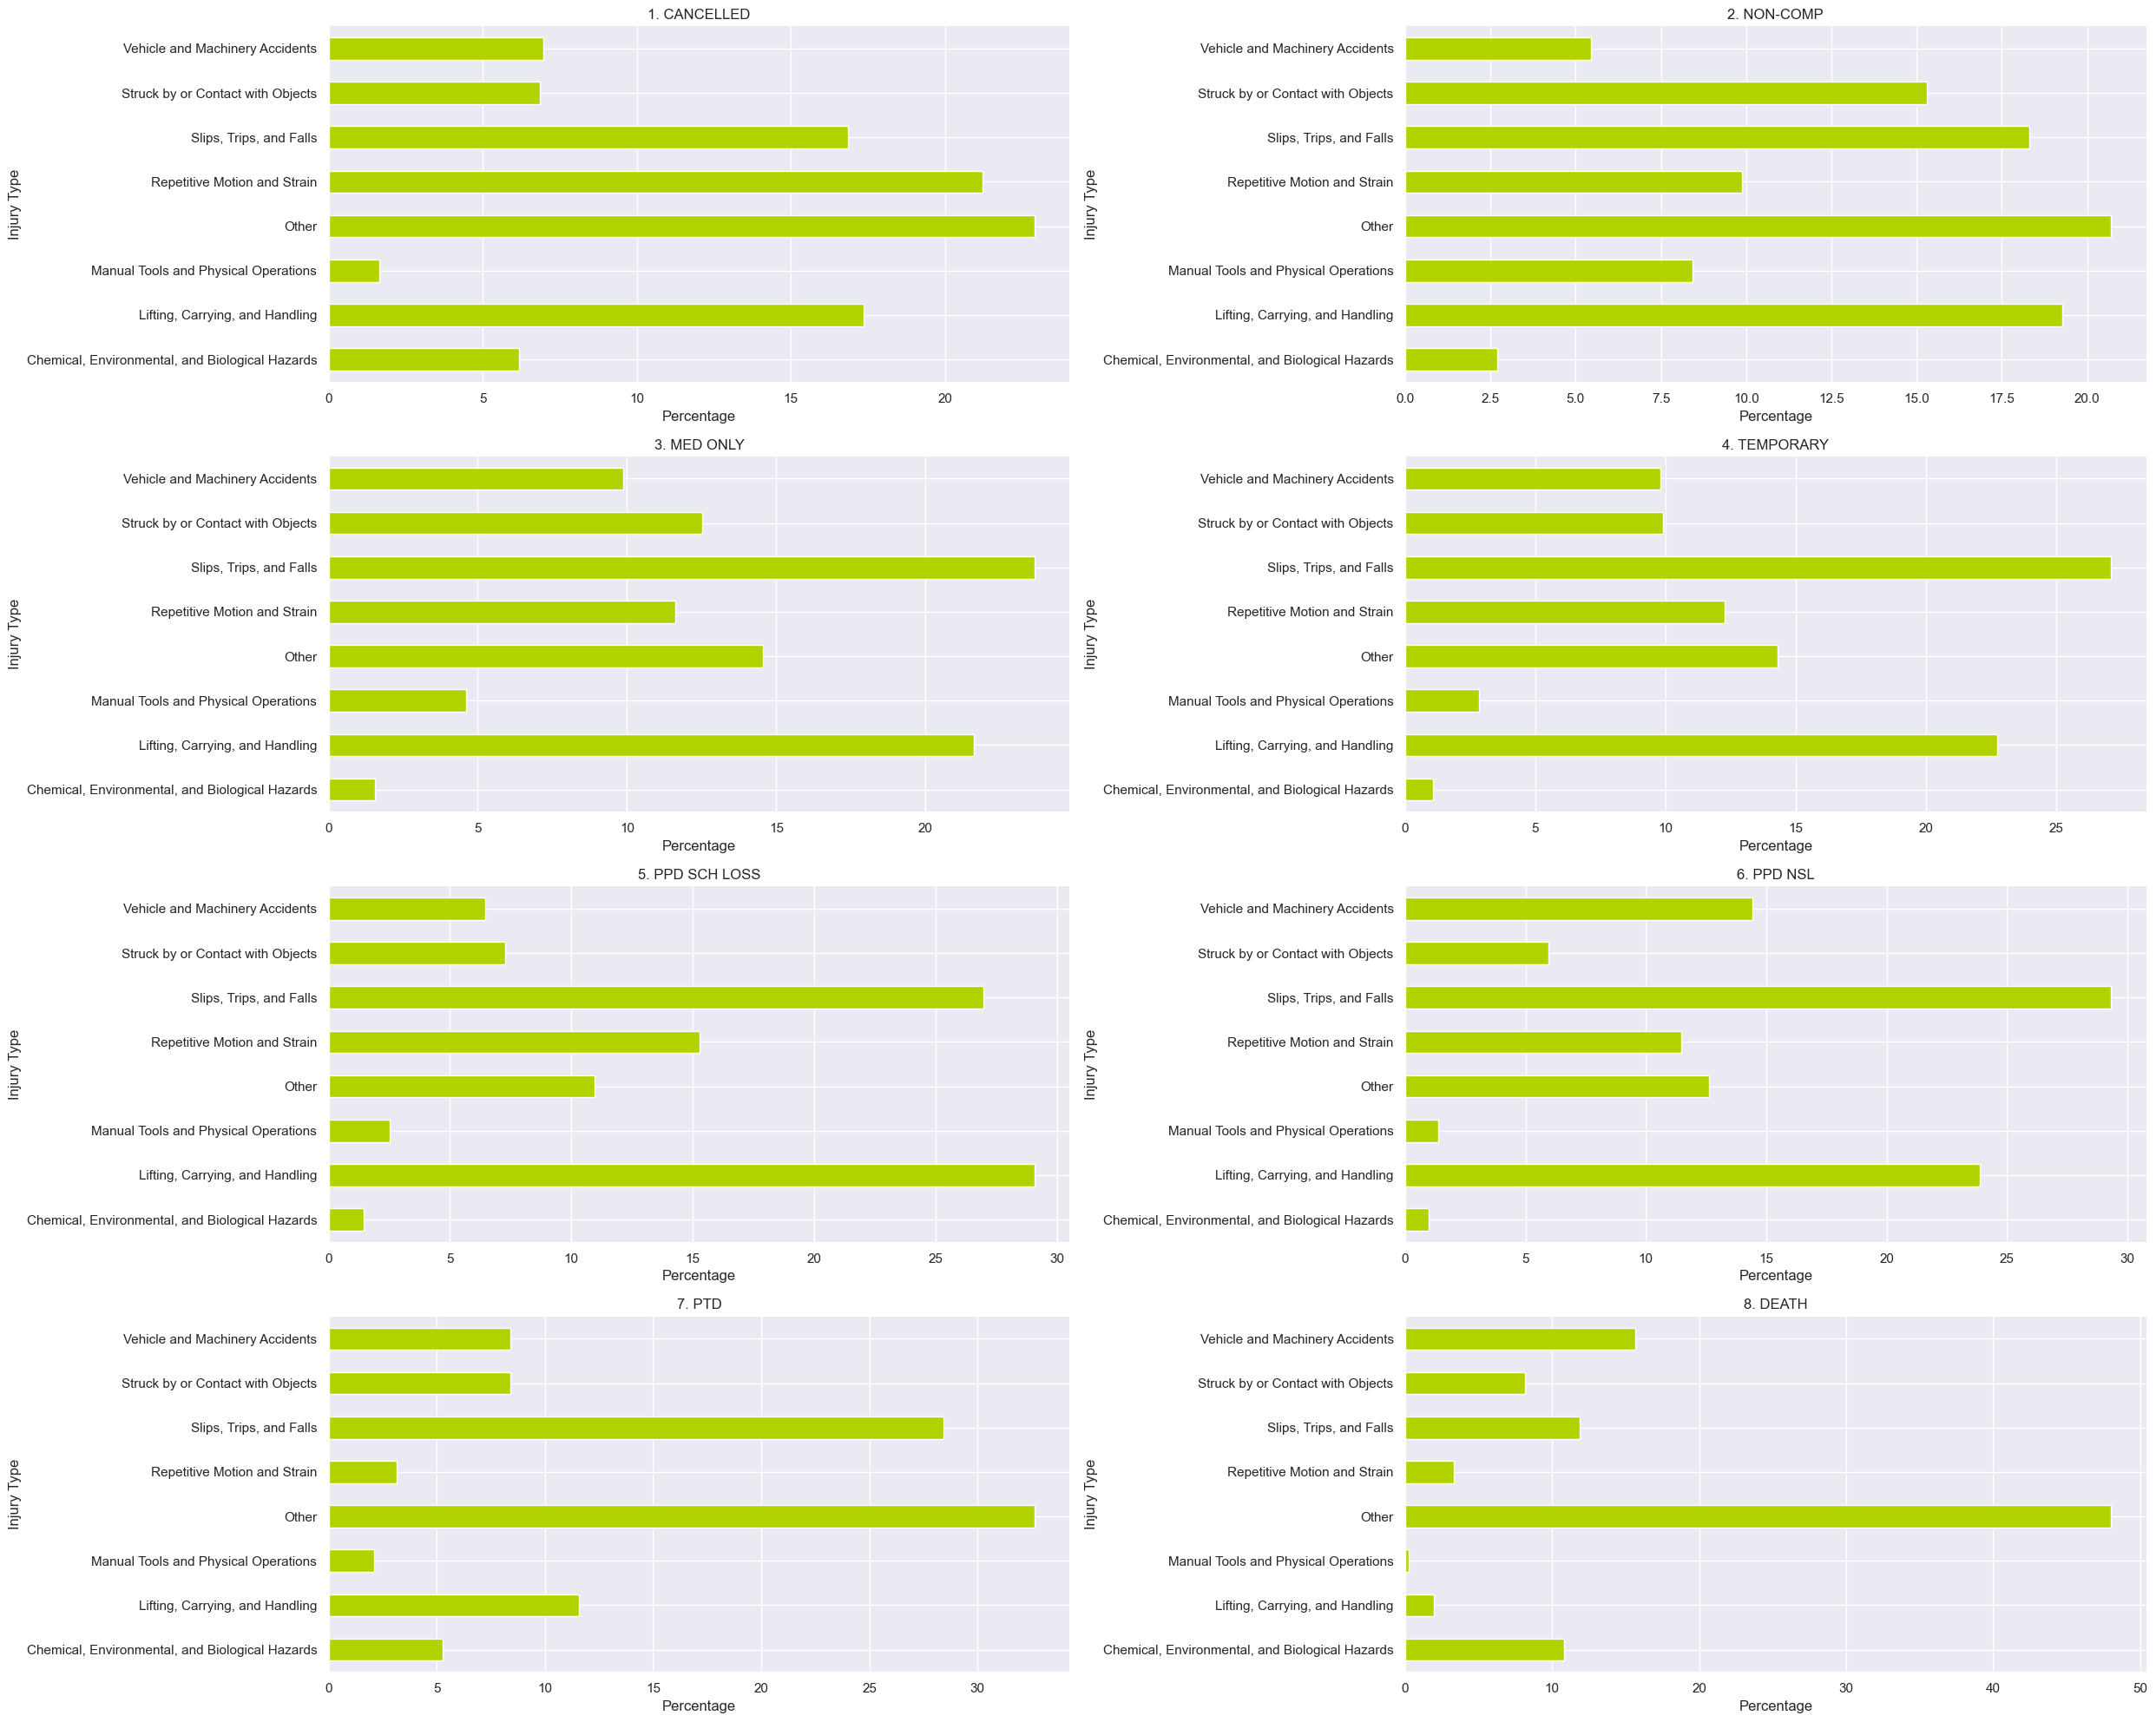

In [113]:
body_group_percentage = df_train.groupby(['Claim Injury Type', 'injury_cause']).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(25, 20))
axes = axes.flatten()
for ax, claim_type in zip(axes, body_group_percentage.index):
    body_group_percentage.loc[claim_type].plot(kind='barh', ax=ax, color='#B2D300')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    ax.set_title(claim_type)
    ax.set_ylabel('Injury Type')
    ax.set_xlabel('Percentage')
    ax.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
plt.tight_layout()
plt.show()

## Time to Assembly Date

We can see how the time between accidents and the day of the claim assembly varies. The assembly date is the date the claim was first assembled.
To create this variable we subtract the accdient date from the assembly date.

In [116]:
df_train['days_accident_to_assembly'] = (df_train['Assembly Date'] - df_train['Accident Date']).dt.days
df_train = df_train[df_train['days_accident_to_assembly'] > 0.0]

C:\Users\alexr\AppData\Local\Temp\ipykernel_52992\1847683429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['days_accident_to_assembly'] = (df_train['Assembly Date'] - df_train['Accident Date']).dt.days


In [117]:
bins = (0, 7, 30, 90, 180, 365, 365*2, 365*10, 60*365)
df_train['days_accident_to_assembly_binned'] = pd.cut(df_train['days_accident_to_assembly'], bins=bins)r

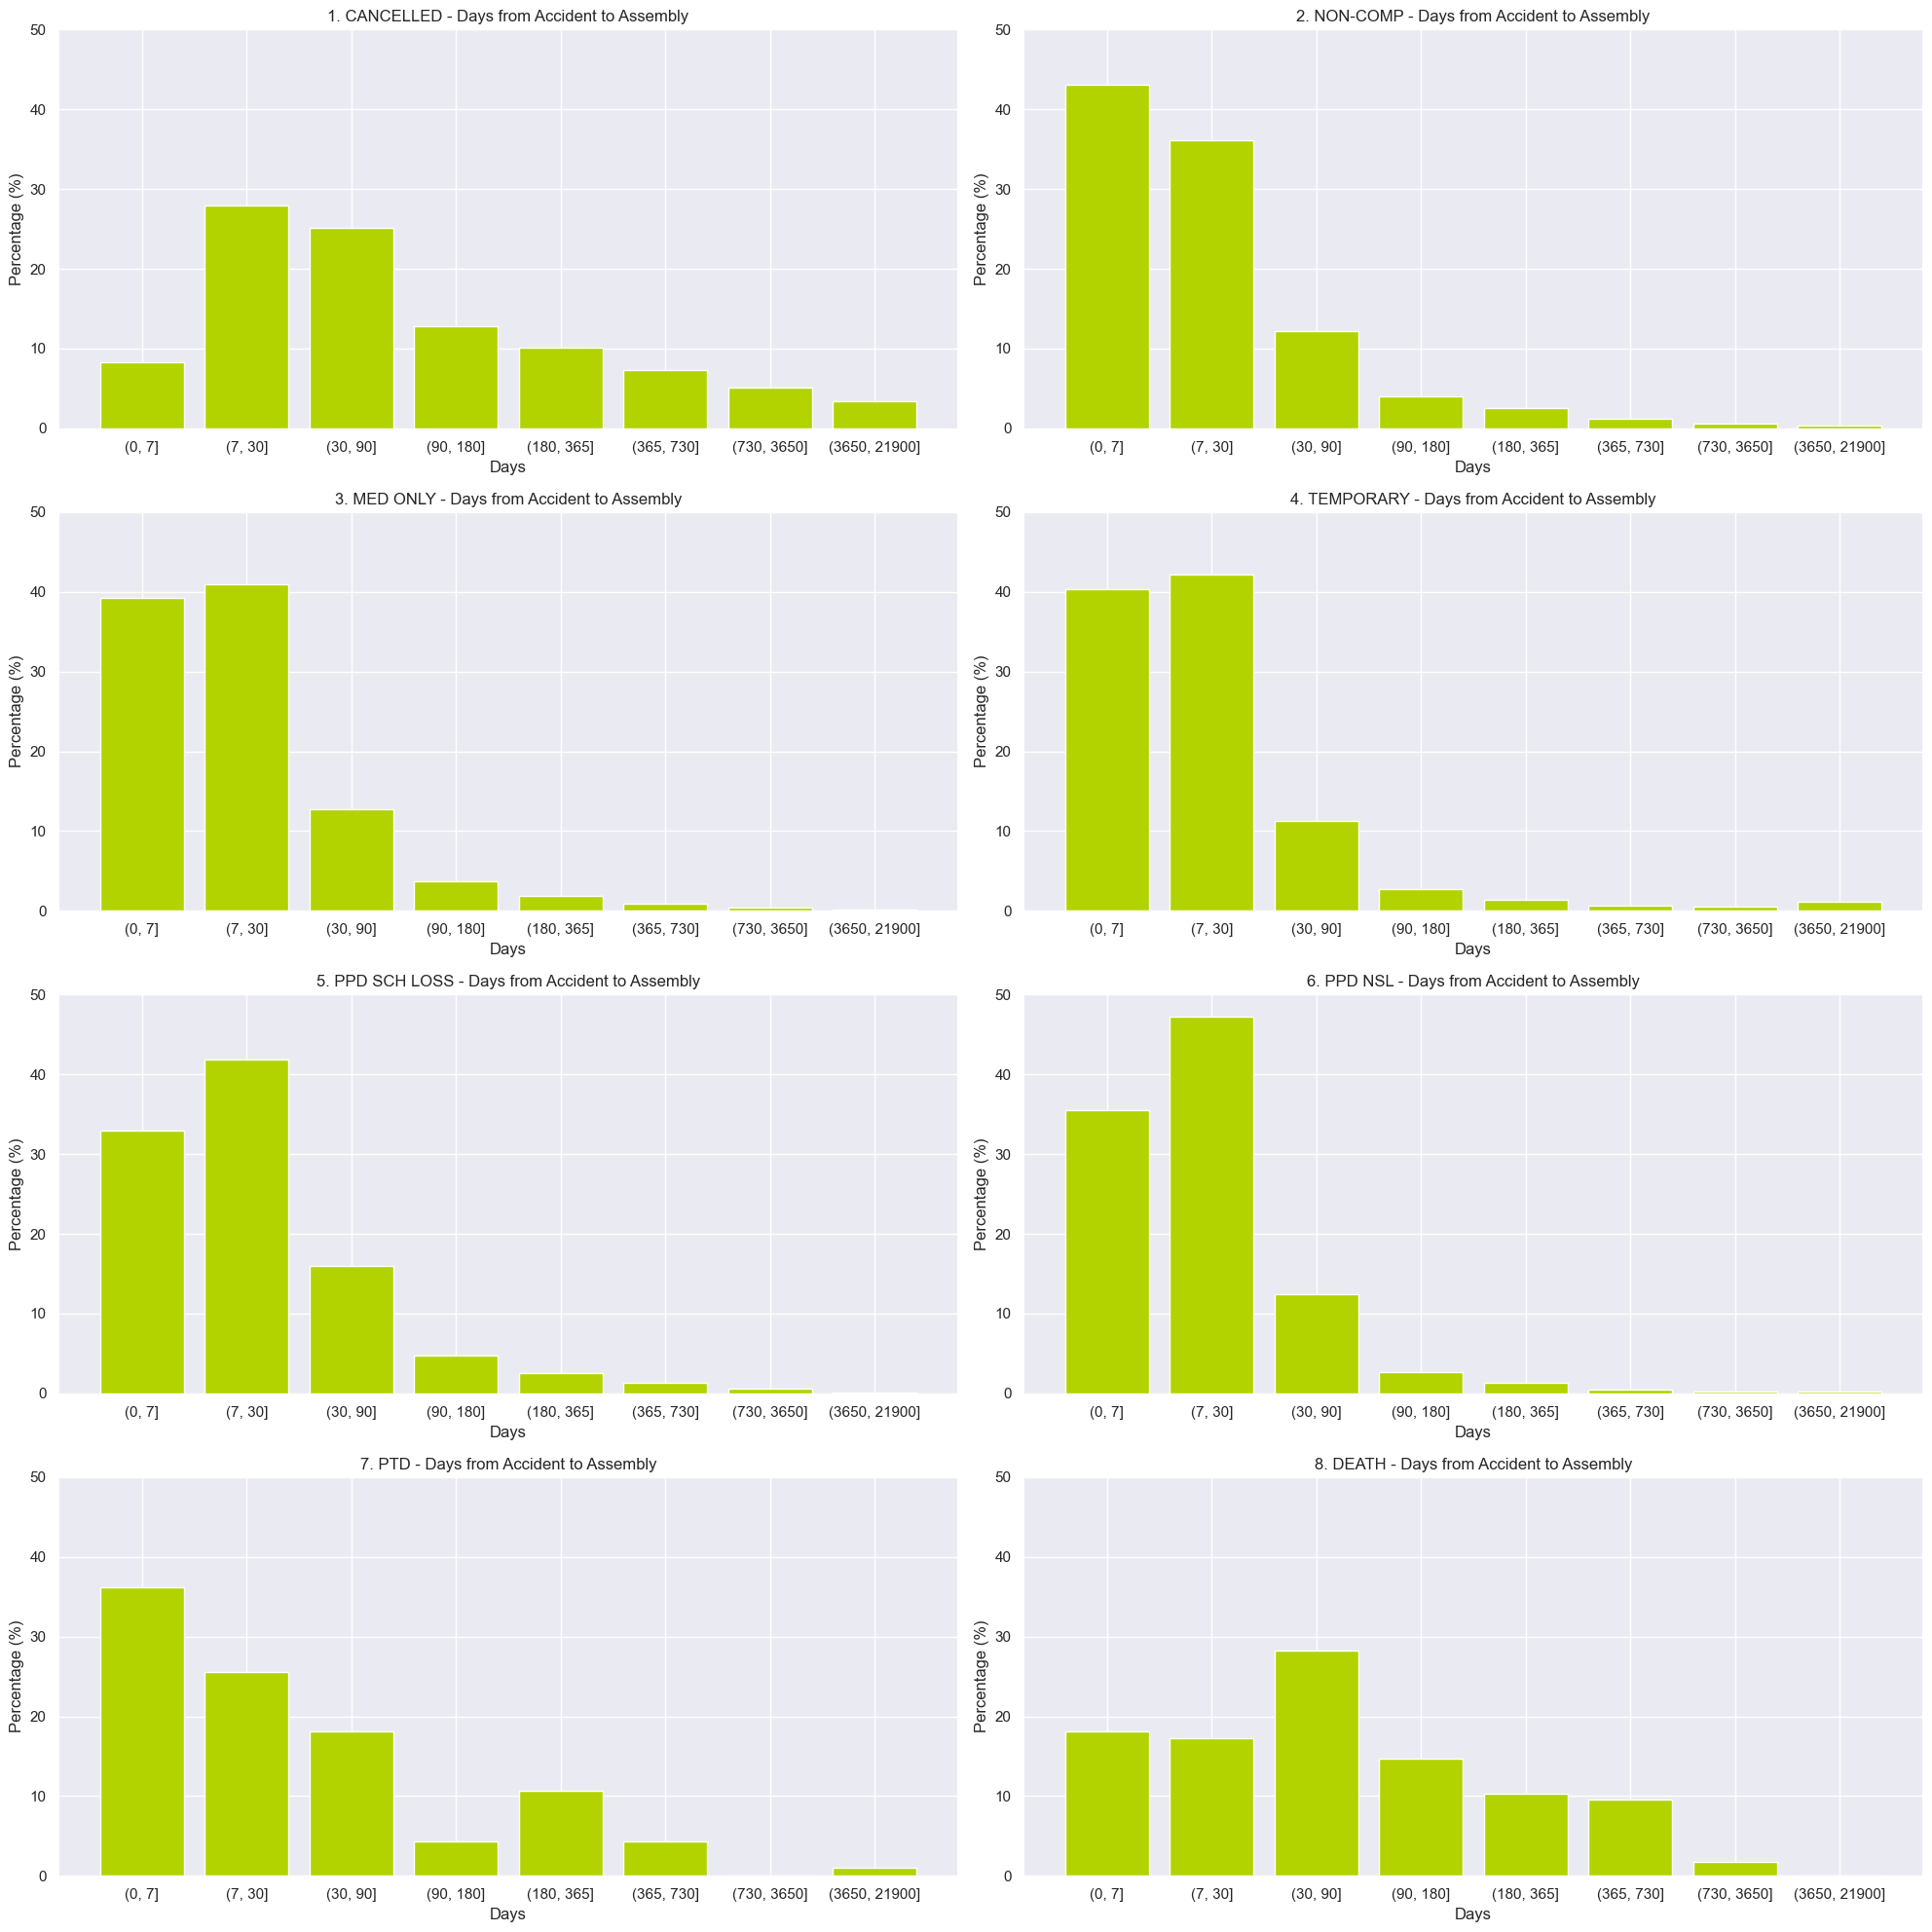

In [119]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
claim_list = ['1. CANCELLED', '2. NON-COMP', '3. MED ONLY', '4. TEMPORARY', '5. PPD SCH LOSS', '6. PPD NSL', '7. PTD', '8. DEATH']

for ax, claim in zip(axes.flatten(), claim_list):
    days_accident_binned = df_train[df_train['Claim Injury Type'] == claim]['days_accident_to_assembly_binned'].value_counts().sort_index()
    bars = ax.bar(days_accident_binned.index.astype(str), days_accident_binned.values / days_accident_binned.values.sum() * 100, color='#B2D300')
    ax.set_title(f'{claim} - Days from Accident to Assembly')
    ax.set_xlabel('Days')
    ax.set_ylabel('Percentage (%)')
    ax.set_ylim(0, 50)
    ax.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
plt.tight_layout()
plt.show()

We should also check for dates where the assembly is done before the accidents, this would constitute a data entry error

In [121]:
negative_days = df_train[df_train['days_accident_to_assembly'] < 0]
negative_days

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,...,Zip Code,Agreement Reached,Number of Dependents,age_group,wage_groups,body_group,injury_type,injury_cause,days_accident_to_assembly,days_accident_to_assembly_binned


There seem te be no such values

# Data Cleaning